In [1]:
# Put asserts throughout next time it's run for future

# Database

In [2]:
import src
from src import *

In [3]:
db.init('database.db')

In [4]:
import pandas as pd
pd.DF = pd.DataFrame

In [5]:
df = pd.read_csv(
    "data/ASD_Release_202309_AS.txt", 
    sep="\t", keep_default_na=False,
    na_values = [
        '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', 
        '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 
        'NULL', 'NaN', 'n/a', 'nan', 'null'
    ] # all defaults in function documentation except "NA"
)
df

,target_id,target_gene,organism,pdb_uniprot,allosteric_pdb,modulator_serial,modulator_alias,modulator_chain,modulator_class,modulator_feature,modulator_name,modulator_resi,function,position,pubmed_id,ref_title,site_overlap,allosteric_site_residue
0,ASD00020000_1,aroG,Escherichia coli,P0AB91,1KFL,ASD02170001,PHE,A,Lig,Inhibitor,(2S)-2-amino-3-phenyl-propanoic acid,1354,Inner Protein Regulator,Protein-Protein Interaction,12126632,Allosteric inhibition of 3-deoxy-D-arabino-hep...,No,"Chain A:PRO150,GLN151,ALA154,GLY178,LEU179,SER..."
1,ASD00020000_2,aroF,Escherichia coli,P00888,6AGM,NaN,TYR,A,Lig,Inhibitor,TYROSINE,601,Inner Protein Regulator,Inner Protein,NaN,NaN,No,NaN
2,ASD00020000_4,aroF,Thermotoga maritima,Q9WYH8,3PG9,ASD00690002,TYR,A,Lig,Inhibitor,(2S)-2-amino-3-(4-hydroxyphenyl)propanoic acid,339,Inner Protein Regulator,Protein-Protein Interaction,21282100,Tyrosine latching of a regulatory gate affords...,No,"Chain A:SER31,GLY33,GLN34,GLU35,ARG36,VAL38; C..."
3,ASD00020000_5,ARO4,Saccharomyces cerevisiae,P32449,1OF6,ASD00020003,DTY,A,Lig,Inhibitor,(2R)-2-amino-3-(4-hydroxyphenyl)propanoic acid,1370,Inner Protein Regulator,Protein-Protein Interaction,NaN,Crystal Structure of the Double Complex of the...,No,"Chain A:THR162,GLN166,ALA169,GLY193,LEU194,SER..."
4,ASD00020000_5,ARO4,Saccharomyces cerevisiae,P32449,1OFR,ASD02170001,PHE,H,Lig,Inhibitor,(2S)-2-amino-3-phenyl-propanoic acid,1002,Inner Protein Regulator,Protein-Protein Interaction,15019786,Substrate and Metal Complexes of 3-Deoxy-D-Ara...,No,"Chain G:THR162,PRO165,GLN166,ALA169,LEU190,GLY..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,ASD80060000_2,NaN,Vibrio cholerae,NaN,3OWZ,ASD01260003,GLY,A,Lig,Regulator,2-aminoethanoic acid,89,Inner DNA/RNA Regulator,Inner DNA/RNA,21145485,Structural insights into ligand recognition by...,No,Chain A:GLY36
3098,ASD80060000_2,NaN,Vibrio cholerae,NaN,3OXE,ASD01260003,GLY,A,Lig,Regulator,2-aminoethanoic acid,89,Inner DNA/RNA Regulator,Inner DNA/RNA,21145485,Structural insights into ligand recognition by...,No,Chain A:GLY36
3099,ASD80060000_2,NaN,Vibrio cholerae,NaN,3OXJ,ASD01260003,GLY,A,Lig,Regulator,2-aminoethanoic acid,89,Inner DNA/RNA Regulator,Inner DNA/RNA,21145485,Structural insights into ligand recognition by...,No,Chain A:GLY36
3100,ASD80060000_2,NaN,Vibrio cholerae,NaN,3OXM,ASD01260003,GLY,A,Lig,Regulator,2-aminoethanoic acid,89,Inner DNA/RNA Regulator,Inner DNA/RNA,21145485,Structural insights into ligand recognition by...,No,Chain A:GLY36


# Statistics

In [6]:
# Total number of sites
len(Site.select())

3219

In [7]:
# Total number of different PDBs
len(PDB.select())

3078

In [8]:
# PDBs with no sites (expected 0)
[(pdb.entry_id, pdb) for p in PDB.select() if len(p.sites) == 0]

[]

In [9]:
# Number of sites in PDBs
set(len(p.sites) for p in PDB.select())

{1, 2, 3, 4}

In [10]:
# PDBs with 4 sites
[p for p in PDB.select() if len(p.sites) == 4]

[<PDB: 1iq5>, <PDB: 3j41>, <PDB: 3l76>]

In [11]:
# Modulator identifier fields used (expected: label_asym_id)
set(tuple(s.modulator.keys()) for s in Site.select())

{('label_asym_id',)}

In [12]:
# Number of different entity instances (different "label_asym_id") annotated as modulators
modulator_chains = dict(
    sorted(
        {s.id: len(s.modulator["label_asym_id"]) for s in Site.select()}.items(),
        key=lambda i: i[-1], reverse=True
    )
)
modulator_chains

{520: 24,
 582: 8,
 608: 6,
 4806: 6,
 5088: 6,
 5246: 6,
 5320: 6,
 5365: 6,
 160: 4,
 187: 4,
 193: 4,
 368: 4,
 380: 4,
 412: 4,
 684: 4,
 741: 4,
 4493: 4,
 4767: 4,
 336: 3,
 419: 3,
 481: 3,
 482: 3,
 483: 3,
 552: 3,
 569: 3,
 570: 3,
 592: 3,
 599: 3,
 615: 3,
 624: 3,
 2319: 3,
 2327: 3,
 2334: 3,
 2633: 3,
 4542: 3,
 4559: 3,
 4577: 3,
 4590: 3,
 4636: 3,
 4733: 3,
 4834: 3,
 4842: 3,
 4863: 3,
 4886: 3,
 4907: 3,
 4929: 3,
 4949: 3,
 4966: 3,
 4979: 3,
 4992: 3,
 5002: 3,
 5003: 3,
 5122: 3,
 5143: 3,
 5190: 3,
 5200: 3,
 5267: 3,
 5272: 3,
 5382: 3,
 5463: 3,
 5471: 3,
 5474: 3,
 5: 2,
 14: 2,
 51: 2,
 75: 2,
 81: 2,
 91: 2,
 92: 2,
 93: 2,
 94: 2,
 95: 2,
 97: 2,
 136: 2,
 140: 2,
 144: 2,
 147: 2,
 150: 2,
 153: 2,
 168: 2,
 175: 2,
 198: 2,
 248: 2,
 254: 2,
 269: 2,
 272: 2,
 288: 2,
 318: 2,
 328: 2,
 339: 2,
 371: 2,
 383: 2,
 418: 2,
 432: 2,
 446: 2,
 463: 2,
 467: 2,
 480: 2,
 488: 2,
 491: 2,
 523: 2,
 526: 2,
 529: 2,
 530: 2,
 573: 2,
 585: 2,
 627: 2,
 748: 2,


# Types of molecules

In [13]:
import tqdm
from tqdm.contrib.concurrent import process_map

In [14]:
def get_site_info(s):
    # Get the type(s) of modulator molecule(s) (non-polymer or which type of polymer) in the site
    s_mod_types = tuple(set(
        mod["polymer_type"] if mod["type"] == "polymer" else mod["type"]
        for mod in s.info["modulator_info"]
    ))

    # If the modulator molecule is a peptide/protein, also save its residue length
    if s_mod_types == ('polypeptide(L)',):
        protein_lengths = [
            mod["length"]
            for mod in s.info["modulator_info"]
            if ( mod["type"] == "polymer" and mod["polymer_type"] == 'polypeptide(L)' )
        ]
    else:
        protein_lengths = None

    # Get the type(s) of polymer(s) that form the modulator binding site
    s_interacting_types = tuple(sorted(set(
        inter["polymer_type"]
        for inter in s.info["interacting_chains_info"]
        if "polymer_type" in inter
    )))

    # If it is exclusively a protein site, get the saved Uniprot code (or its absence)
    uniprots = []
    if s_interacting_types == ('polypeptide(L)',):
        for inter in s.info["interacting_chains_info"]:
            if "polymer_type" in inter and inter["polymer_type"] == 'polypeptide(L)':
                if "Uniprot" in inter:
                    us = inter["Uniprot"]
                else:
                    us = [None]
                uniprots.extend(us)
        assert len(uniprots) > 0

    return s_mod_types, protein_lengths, s_interacting_types, uniprots



infos = process_map(
    get_site_info, 
    Site.select(),
    tqdm_class=tqdm.notebook.tqdm, max_workers=20, total=len(Site.select())
)

/tmp/ipykernel_525180/1347815261.py:41: TqdmWarning: Iterable length 3219 > 1000 but `chunksize` is not set. This may seriously degrade multiprocess performance. Set `chunksize=1` or more.
  infos = process_map(


  0%|          | 0/3219 [00:00<?, ?it/s]

In [15]:
mod_types, protein_lengths, interacting_types, uniprots = zip(*infos)

# Modulators

In [16]:
# Types of modulator molecule(s)
{mod_type: mod_types.count(mod_type) for mod_type in set(mod_types)}

{('branched',): 16,
 ('non-polymer',): 3126,
 ('polypeptide(L)',): 76,
 ('polyribonucleotide',): 1}

## Modulator and site sizes

Examine the modulator molecular weights and the sizes of the sites (number of residues) to detect outliers and compare different modulator molecule types

In [17]:
def get_sizes(s):
    # Get the sum of the molecular weight for all instances of the modulator(s) in the site
    weight = sum(
        # Get the weight of the modulato molecule entity from the .cif
        float(
            pd.DF(
                s.pdb.cif.data["_entity"], dtype=str
            ).query(
                f"""id == '{m["label_entity_id"]}'"""
            )["formula_weight"].item()
        )
        # For each instance (label_asym_id) of each modulator (label_entity_id)
        for m in s.modulator_residues[
        ["label_asym_id", "label_entity_id"]
        ].drop_duplicates().to_dict(orient="records")
    )

    # Get the number of residues of the site (NMR model 1)
    site_size = len(s.protein_residues.query("pdbx_PDB_model_num == '1'"))
    
    return {
        "pdb": s.pdb.entry_id,
        "site": s.id,
        "modulator": s.modulator,
        "type": s.info["modulator_info"][0]["type"] if s.info["modulator_info"][0]["type"] in ["non-polymer", "branched"] else s.info["modulator_info"][0]["polymer_type"],
        "weight": weight,
        "size": site_size,
    }


sizes = process_map(
    get_sizes, 
    (
        s
        for s in Site.select()
        if any(c["polymer_type"] == "polypeptide(L)" for c in s.info["interacting_chains_info"])
    ), 
    tqdm_class=tqdm.notebook.tqdm, max_workers=10, total=len(Site.select())
)

  0%|          | 0/3219 [00:00<?, ?it/s]


Database-stored cif file hash doesn't coincide with retrieved cif file hash: entry was created with a different (e.g., outdated) cif file version.


In [18]:
sizes_df = pd.DF(sizes)
sizes_df

,pdb,site,modulator,type,weight,size
0,5lvp,5,"{'label_asym_id': ['F', 'G']}",polypeptide(L),3023.018,48
1,6i53,6,{'label_asym_id': ['F']},polypeptide(L),13462.909,35
2,4o3t,7,{'label_asym_id': ['C']},polypeptide(L),1322.530,31
3,4o3u,8,{'label_asym_id': ['C']},polypeptide(L),1786.081,35
4,1l5g,9,{'label_asym_id': ['C']},polypeptide(L),607.680,27
...,...,...,...,...,...,...
3198,5cgc,5894,{'label_asym_id': ['G']},non-polymer,299.690,29
3199,8tao,5895,{'label_asym_id': ['F']},non-polymer,364.399,30
3200,4oo9,5897,{'label_asym_id': ['F']},non-polymer,313.391,35
3201,8fx5,5899,{'label_asym_id': ['G']},non-polymer,281.417,12


### Modulators weights

In [19]:
# Smallest modulators
sizes_df.sort_values("weight")

,pdb,site,modulator,type,weight,size
2347,3c31,3884,{'label_asym_id': ['C']},non-polymer,6.941,12
2357,3c36,3894,{'label_asym_id': ['C']},non-polymer,18.038,11
152,5dw0,306,{'label_asym_id': ['F']},non-polymer,22.990,16
1692,3r3g,3049,{'label_asym_id': ['D']},non-polymer,22.990,12
1691,3jz1,3048,{'label_asym_id': ['F']},non-polymer,22.990,11
...,...,...,...,...,...,...
70,5th9,93,"{'label_asym_id': ['A', 'B']}",polypeptide(L),48230.979,36
73,5bjz,97,"{'label_asym_id': ['E', 'F']}",polypeptide(L),48836.285,64
61,5k1c,82,{'label_asym_id': ['B']},polypeptide(L),63224.582,36
57,5c6d,75,"{'label_asym_id': ['A', 'B']}",polypeptide(L),74722.610,18


The smallest modulators are, as expected, non-polymer/small-molecules and correspond to ions.

<br>

In [20]:
# Biggest modulators
sizes_df.sort_values("weight", ascending=False)[:10]

,pdb,site,modulator,type,weight,size
74,5k1a,99,{'label_asym_id': ['D']},polypeptide(L),76312.398,36
57,5c6d,75,"{'label_asym_id': ['A', 'B']}",polypeptide(L),74722.610,18
61,5k1c,82,{'label_asym_id': ['B']},polypeptide(L),63224.582,36
73,5bjz,97,"{'label_asym_id': ['E', 'F']}",polypeptide(L),48836.285,64
70,5th9,93,"{'label_asym_id': ['A', 'B']}",polypeptide(L),48230.979,36
69,3vga,92,"{'label_asym_id': ['B', 'C']}",polypeptide(L),47822.828,44
68,3vg9,91,"{'label_asym_id': ['B', 'C']}",polypeptide(L),47822.828,44
71,5nj3,94,"{'label_asym_id': ['C', 'D']}",polypeptide(L),47437.649,37
47,6htf,62,{'label_asym_id': ['B']},polypeptide(L),31097.264,31
75,6ikm,113,{'label_asym_id': ['BA']},polypeptide(L),27053.006,58


The biggest modulators are protein modulators and antibodies.

<br>

array([[<Axes: title={'center': 'branched'}>,
        <Axes: title={'center': 'non-polymer'}>],
       [<Axes: title={'center': 'polypeptide(L)'}>,
        <Axes: title={'center': 'polyribonucleotide'}>]], dtype=object)

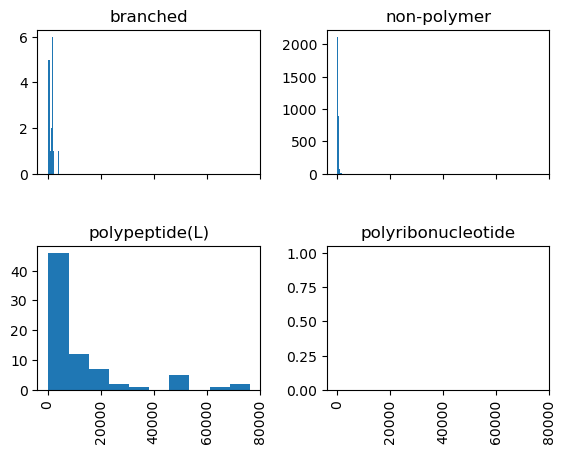

In [21]:
sizes_df.hist("weight", by="type", sharex=True)

In [22]:
# 5 biggest modulators per type
pd.concat([group.sort_values("weight", ascending=False)[:5] for _, group in sizes_df.groupby("type")])

,pdb,site,modulator,type,weight,size
110,1tb6,223,{'label_asym_id': ['E']},branched,4431.095,36
148,5ue5,300,{'label_asym_id': ['B']},branched,2327.897,43
2802,3pma,4504,"{'label_asym_id': ['E', 'F']}",branched,1965.606,29
1506,1sr5,2755,{'label_asym_id': ['D']},branched,1815.723,27
1503,1azx,2716,{'label_asym_id': ['D']},branched,1661.413,28
185,3fyh,520,"{'label_asym_id': ['F', 'G', 'H', 'I', 'J', 'K...",non-polymer,4412.160,8
2919,6i0o,5365,"{'label_asym_id': ['C', 'D', 'E', 'P', 'Q', 'R']}",non-polymer,3139.080,134
2908,5tc3,5246,"{'label_asym_id': ['D', 'E', 'F', 'I', 'J', 'K']}",non-polymer,2787.166,135
2918,6i0m,5320,"{'label_asym_id': ['D', 'E', 'F', 'O', 'P', 'Q']}",non-polymer,2659.206,131
2895,4z87,5088,"{'label_asym_id': ['F', 'G', 'H', 'L', 'M', 'N']}",non-polymer,2659.206,127


array([[<Axes: title={'center': 'branched'}>,
        <Axes: title={'center': 'non-polymer'}>],
       [<Axes: title={'center': 'polypeptide(L)'}>,
        <Axes: title={'center': 'polyribonucleotide'}>]], dtype=object)

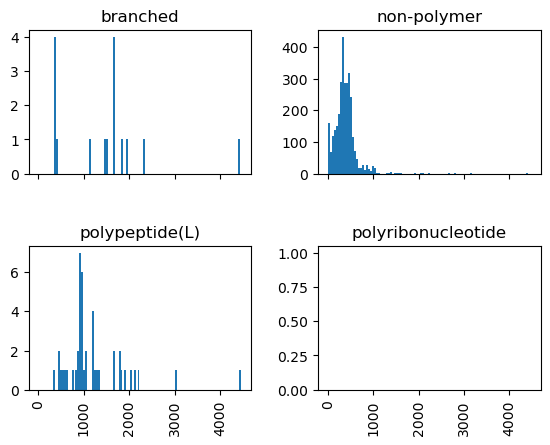

In [23]:
sizes_df.loc[lambda x: x["weight"] < 5000].hist("weight", by="type", sharex=True, bins=100)

- Even the biggest small-molcule/non-polymer (mostly multiple molecules of a modulator that bind together) and branched (polysaccharide) modulators do not get close to the molecular weights of the biggest proteins.
- There are many polypeptides that match the sizes of common non-polymer and branched modulators.
- The only polyribonucleotide modulator is a small trinucleotide chain with a common molecular weight.

<br>

### Site size (# of residues) vs modulator weight

<Axes: xlabel='weight', ylabel='size'>

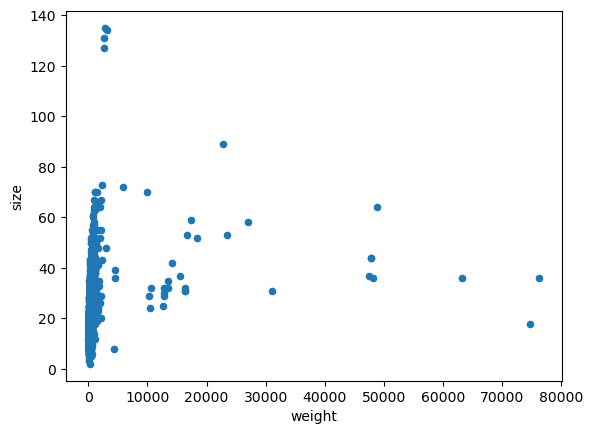

In [24]:
sizes_df.plot(x="weight", y="size", kind="scatter")

In [25]:
import matplotlib.pyplot as plt

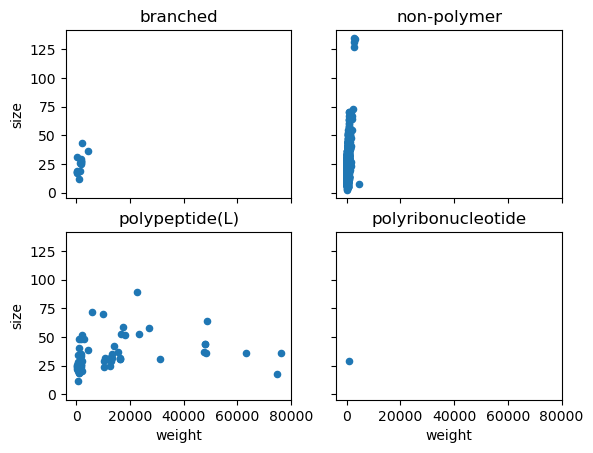

In [26]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
for (key, grp), ax in zip(sizes_df.groupby("type"), axs.flatten()):
    grp.plot(x="weight", y="size", ax=ax, title=key, kind="scatter")

"Outlier" big allosteric proteins do not have a disproportionate allosteric site size. On the other hand, some small non-polymer/small-molecule modulators have a big site size.

<br>

In [27]:
# 5 biggest sites per modulator type
pd.concat([group.sort_values("size", ascending=False)[:5] for _, group in sizes_df.groupby("type")])

,pdb,site,modulator,type,weight,size
148,5ue5,300,{'label_asym_id': ['B']},branched,2327.897,43
110,1tb6,223,{'label_asym_id': ['E']},branched,4431.095,36
967,4rzt,1940,{'label_asym_id': ['E']},branched,397.634,31
2802,3pma,4504,"{'label_asym_id': ['E', 'F']}",branched,1965.606,29
1503,1azx,2716,{'label_asym_id': ['D']},branched,1661.413,28
2908,5tc3,5246,"{'label_asym_id': ['D', 'E', 'F', 'I', 'J', 'K']}",non-polymer,2787.166,135
2919,6i0o,5365,"{'label_asym_id': ['C', 'D', 'E', 'P', 'Q', 'R']}",non-polymer,3139.080,134
2918,6i0m,5320,"{'label_asym_id': ['D', 'E', 'F', 'O', 'P', 'Q']}",non-polymer,2659.206,131
2895,4z87,5088,"{'label_asym_id': ['F', 'G', 'H', 'L', 'M', 'N']}",non-polymer,2659.206,127
194,4dqw,582,"{'label_asym_id': ['C', 'D', 'E', 'F', 'I', 'J...",non-polymer,2248.476,73


The biggest sites of small-molecule/non-polymer modulators correspond to many molecules that bind together and thus extend a large surface. Likewise, the biggest sites of polypeptide modulators, though smaller, are also large antibodies or extended peptidic modulators that cover a large area as well.

<br>

## Proteins/peptides modulators lengths

Despite having comparable site sizes with non-polypeptidic modulators in the solved structures albeit reaching much larger sizes, the question of whether their mechanism is biologically comparable to small modulators of other types remains.


<table border="1">
<thead>
  <tr>
    <th>Types of allosteric peptide/protein</th>
    <th>Size</th>
    <th>Interest</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>really peptides</td>
    <td>small-molecule size-like</td>
    <td rowspan="2">interesting for DD/Comparable to small molecules</td>
  </tr>
  <tr>
    <td rowspan="2">peptides   of   real   proteins</td>
    <td>proteins of small-molecule size-like</td>
  </tr>
  <tr>
    <td>in reality, a whole bigger protein is interacting and is allosteric</td>
    <td>the solved/crystallized peptide is not necessarily the driver of allosterism</td>
  </tr>
  <tr>
    <td>whole proteins/antibodies</td>
    <td colspan="2">binding site will be very big and expand even multiple domains and mechanisms and characteristics are porbably different to small-molecules</td>
  </tr>
</tbody>
</table>

In addition to the possible conformation-locking mechanism of big allosteric antibodies and other scaffolding big allosteric proteins in opposition to small-molecules, small peptides on the structures that are fragments of bigger proteins might be tempting to be assimilated to non-polypeptidic modulators of comparable size, while in a biologically meaningful environment the allosteric effect could be carried out by the whole protein and this fact be responsible for the annotation of the peptide as allosteric.

In [28]:
# Lengths of modulator peptides/proteins
[i for l in protein_lengths if l is not None for i in l]

[8,
 8,
 123,
 9,
 14,
 5,
 18,
 4,
 17,
 17,
 88,
 105,
 105,
 109,
 92,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 161,
 114,
 12,
 11,
 19,
 201,
 8,
 92,
 7,
 13,
 13,
 13,
 12,
 14,
 258,
 135,
 135,
 135,
 8,
 10,
 10,
 120,
 4,
 5,
 311,
 313,
 124,
 5,
 24,
 26,
 515,
 54,
 8,
 6,
 185,
 132,
 8,
 212,
 224,
 212,
 220,
 214,
 208,
 208,
 210,
 49,
 47,
 231,
 213,
 597,
 225]

<Axes: >

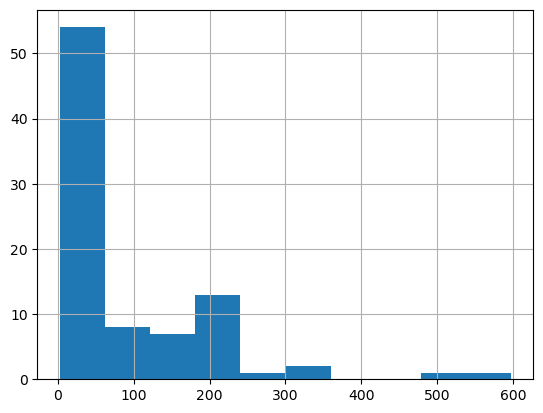

In [29]:
pd.Series([i for l in protein_lengths if l is not None for i in l ]).hist()

In [30]:
import json, requests
def get_uniprot_length(uniprot_id):
    response = requests.get(f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json?include=yes")
    try:
        assert response.status_code != 404, f"Uniprot not found: {response.status_code}"
        return len(json.loads(response.text)["sequence"]["value"])
    except:
        print(uniprot_id)
        return "-"

In [31]:
import numpy as np

def get_peptides(s):
    for m in s.info["modulator_info"]:
        assert len([u for u in m["Uniprot"] if u != "?"]) == 1 if "Uniprot" in m else True

        d = {
            "pdb": s.pdb.entry_id,
            "site": s.id,
            "modulator": f"{m['modulator']}",
            "name": m["pdbx_description"],
            "length": m["length"],
            "uniprot": next(u for u in m["Uniprot"] if u != "?") if "Uniprot" in m else np.nan,
            "uniprot_length": next(
                get_uniprot_length(u)
                for u in m["Uniprot"]
                if u != "?"
            ) if "Uniprot" in m else np.nan,
            "u_conflicts": len(s.modulator_residues.query("pdbx_sifts_xref_db_acc == '?'")) or np.nan if "Uniprot" in m and "?" in m["Uniprot"] else np.nan,
            "site_chains": s.protein_residues.label_asym_id.unique().tolist(),
            "site_size": len(s.protein_residues),
            
        }
        
        d["uniprot_ratio"] = d["length"]/d["uniprot_length"] if d["uniprot_length"] is not np.nan else np.nan
        
        return d
        


peptides = process_map(
    get_peptides, 
    (
        s
        for s in Site.select()
        if all(
            m["type"] == "polymer" and "polypeptide" in m["polymer_type"] 
            for m in s.info["modulator_info"]
        )
    ), 
    tqdm_class=tqdm.notebook.tqdm, max_workers=10, total=len(Site.select())
)

  0%|          | 0/3219 [00:00<?, ?it/s]

In [32]:
peptides_df = pd.DF(peptides)
peptides_df

,pdb,site,modulator,name,length,uniprot,uniprot_length,u_conflicts,site_chains,site_size,uniprot_ratio
0,5lvp,5,[{'label_asym_id': 'F'}],hydrophobic-motif peptide of PKB/Akt,8,NaN,NaN,NaN,"[A, B]",48,NaN
1,6i53,6,[{'label_asym_id': 'F'}],Megabody38,123,NaN,NaN,NaN,"[B, A]",35,NaN
2,4o3t,7,[{'label_asym_id': 'C'}],ZAP.14,9,NaN,NaN,NaN,[A],31,NaN
3,4o3u,8,[{'label_asym_id': 'C'}],ZAP 2.3,14,NaN,NaN,NaN,"[A, B]",35,NaN
4,1l5g,9,[{'label_asym_id': 'C'}],CYCLIC ARG-GLY-ASP PEPTIDE,5,NaN,NaN,NaN,"[A, B]",27,NaN
...,...,...,...,...,...,...,...,...,...,...,...
71,5nj3,94,[{'label_asym_id': 'C'}],5D3-Fab heavy chain,208,NaN,NaN,NaN,"[A, B]",37,NaN
72,4riq,95,[{'label_asym_id': 'A'}],Protein dpy-30 homolog,49,Q9C005,99.0,NaN,"[C, W, L]",25,0.494949
73,5bjz,97,[{'label_asym_id': 'E'}],"Synthetic antibody, Fab fragment, Heavy Chain",231,NaN,NaN,NaN,"[A, D]",64,NaN
74,5k1a,99,[{'label_asym_id': 'D'}],WD repeat-containing protein 48,597,Q8TAF3,677.0,NaN,"[C, E]",36,0.881832


In [33]:
peptides_df[peptides_df.isna()["uniprot"]].sort_values(["length", "pdb"])

,pdb,site,modulator,name,length,uniprot,uniprot_length,u_conflicts,site_chains,site_size,uniprot_ratio
15,3gcn,23,[{'label_asym_id': 'B'}],YQF peptide,3,NaN,NaN,NaN,[A],24,NaN
18,3gdu,28,[{'label_asym_id': 'F'}],YRF peptide,3,NaN,NaN,NaN,[C],26,NaN
19,3gdv,29,[{'label_asym_id': 'D'}],YQF peptide,3,NaN,NaN,NaN,[A],22,NaN
13,1soz,21,[{'label_asym_id': 'E'}],activating peptide,4,NaN,NaN,NaN,[B],25,NaN
14,2r3y,22,[{'label_asym_id': 'D'}],Synthetic peptide YWF,4,NaN,NaN,NaN,[A],21,NaN
16,3gco,24,[{'label_asym_id': 'B'}],DNRDGNVYQF peptide,4,NaN,NaN,NaN,[A],22,NaN
17,3gds,25,[{'label_asym_id': 'B'}],DNRDGNVYYF peptide,4,NaN,NaN,NaN,[A],22,NaN
6,4fgt,11,[{'label_asym_id': 'B'}],CG peptide,4,NaN,NaN,NaN,[A],12,NaN
55,4qby,71,[{'label_asym_id': 'BA'}],BOC-ALA-ALA-ALA-CHO,4,NaN,NaN,NaN,"[K, L]",25,NaN
20,4rqz,31,[{'label_asym_id': 'E'}],activating peptide,4,NaN,NaN,NaN,[B],21,NaN


Short peptides not associated to any Uniprot seem to be really short tool peptides and not fragments of a bigger protein, although starting already from length 8 the names of the peptides in the PDB lead to think that they are fragments of proteins but somehow not associated to their Uniprots. Big proteins of up to 258 residues not associated to a Uniprot are mostly antibodies and similars.

There could be a division between peptides at the 20-80 length range, as the last element with peptide in the name is "PEPTIDE E-76" with length 19 and then with length 88 there is the first "Monobody". With length 54, there is a peptide called "C-terminal fragment of KU80 (KU80ct194)".

<br>

In [34]:
peptides_df[~peptides_df.isna()["uniprot"]].sort_values(["length", "pdb"])

,pdb,site,modulator,name,length,uniprot,uniprot_length,u_conflicts,site_chains,site_size,uniprot_ratio
51,4h36,66,[{'label_asym_id': 'B'}],Cyclic AMP-dependent transcription factor ATF-2,8,P15336,505.0,NaN,[A],22,0.015842
63,5n70,84,[{'label_asym_id': 'B'}],ALA-PHE-ARG-ILE-PRO-LEU-THR-ARG,8,A4GTA5,382.0,NaN,[A],40,0.020942
67,6eop,88,[{'label_asym_id': 'D'}],SER-LEU-ARG-PHE-LEU-TYR-GLU-GLY,8,P63165,101.0,NaN,[A],48,0.079208
52,4h39,67,[{'label_asym_id': 'B'}],C-Jun-amino-terminal kinase-interacting protein 1,10,Q9UQF2,711.0,NaN,[A],26,0.014065
53,4h3b,68,[{'label_asym_id': 'B'}],SH3 domain-binding protein 5,10,O60239,455.0,NaN,[A],26,0.021978
7,4c3p,14,[{'label_asym_id': 'B'}],TARGETING PROTEIN FOR XKLP2,17,Q9ULW0,747.0,NaN,"[A, C]",70,0.022758
60,5fvl,81,[{'label_asym_id': 'C'}],VACUOLAR PROTEIN SORTING-ASSOCIATED PROTEIN 20,24,Q04272,221.0,1.0,"[A, B]",72,0.108597
72,4riq,95,[{'label_asym_id': 'A'}],Protein dpy-30 homolog,49,Q9C005,99.0,NaN,"[C, W, L]",25,0.494949
12,5dc4,19,[{'label_asym_id': 'B'}],AS25 monobody,92,P02751,2477.0,NaN,[A],29,0.037142
9,5l8j,16,[{'label_asym_id': 'B'}],New antigen receptor variable domain,105,Q8JJ25,108.0,2.0,[A],29,0.972222


Short peptides associated to a Uniprot start from the same lengths of short peptides not associated to a Uniprot, but then again there might be a division between peptides at the 24-92 range, with a "Protein dpy-30 homolog" with length 49. Interestingly, the short peptides below 24 length do not contain "peptide" in their names and instead mostly contain the name of the protein they belong to. Additionally, the length of these peptides is a very small percentage of the whole length of the associated Uniprot sequences. Contrastingly, the proteins with lengths >50 mostly are the entire or a considerable percentage of their Uniprot sequences.

<br>

In [35]:
peptides_df.sort_values("site_size", ascending=False)[:10]

,pdb,site,modulator,name,length,uniprot,uniprot_length,u_conflicts,site_chains,site_size,uniprot_ratio
65,5cus,86,[{'label_asym_id': 'F'}],Fab LC region of KTN3379,185,NaN,NaN,NaN,"[A, E, B]",89,NaN
60,5fvl,81,[{'label_asym_id': 'C'}],VACUOLAR PROTEIN SORTING-ASSOCIATED PROTEIN 20,24,Q04272,221.0,1.0,"[A, B]",72,0.108597
7,4c3p,14,[{'label_asym_id': 'B'}],TARGETING PROTEIN FOR XKLP2,17,Q9ULW0,747.0,NaN,"[A, C]",70,0.022758
73,5bjz,97,[{'label_asym_id': 'E'}],"Synthetic antibody, Fab fragment, Heavy Chain",231,NaN,NaN,NaN,"[A, D]",64,NaN
35,6i2p,46,[{'label_asym_id': 'C'}],Glycogen accumulation regulator GarA,114,P9WJA9,162.0,NaN,"[A, B]",59,0.703704
75,6ikm,113,[{'label_asym_id': 'BA'}],ScFv5,225,NaN,NaN,NaN,"[AA, CA, O]",58,NaN
62,5luq,83,[{'label_asym_id': 'B'}],C-terminal fragment of KU80 (KU80ct194),54,NaN,NaN,NaN,[A],53,NaN
38,4z6a,53,[{'label_asym_id': 'C'}],Tissue factor,201,P13726,295.0,NaN,"[A, B]",53,0.681356
34,5oyj,45,[{'label_asym_id': 'A'}],DARPin D4b,161,NaN,NaN,NaN,"[D, C]",52,NaN
46,3zqi,61,[{'label_asym_id': 'C'}],INDUCER PEPTIDE TIP2,14,NaN,NaN,NaN,"[A, B]",52,NaN


<Axes: xlabel='length', ylabel='site_size'>

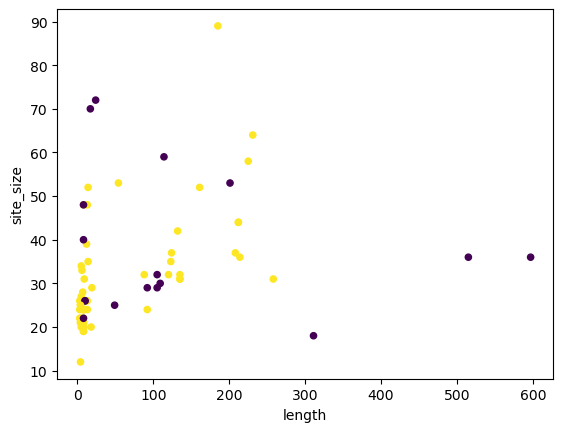

In [36]:
# peptides_df.plot.scatter()
peptides_df.plot(x="length", y="site_size", kind="scatter", c=peptides_df.isna()["uniprot"])

There are no detectable trends wrt site size.

<br>

# Interacting chains

In [37]:
# Types of interacting/site-forming molecule(s)
{interacting_type: interacting_types.count(interacting_type) for interacting_type in set(interacting_types)}

{('polyribonucleotide',): 16,
 ('polypeptide(L)',): 3197,
 ('polydeoxyribonucleotide', 'polypeptide(L)'): 6}

In [38]:
# Uniprots
len(uniprots)

3219

In [39]:
# Uniprot counts for polypeptide-formed sites
all_uniprots = [i for l in uniprots for i in l]
all_uniprots

['O15530',
 'P28472',
 'P14867',
 'P14210',
 'P14210',
 'P08581',
 'P06756',
 'P05106',
 'M1VAN7',
 'P04818',
 'O14965',
 'O14965',
 'O14965',
 'O14965',
 'O14965',
 'P00519',
 'P0AEE3',
 'P0AEE3',
 'P0AEE3',
 'P0AEE3',
 'P0AEE3',
 'P0AEE3',
 'P0AEE3',
 'P0AEE3',
 'P12497',
 'P12497',
 'P12497',
 'P12497',
 'P12497',
 'P12497',
 'P12497',
 'P03366',
 'P12497',
 'P12497',
 'P12497',
 'P12497',
 'P12497',
 'P35968',
 '?',
 'P9WI81',
 'P55212',
 'P08709',
 'P08709',
 'P08709',
 'P45985',
 'P01112',
 'O36607',
 'P04483',
 'P04483',
 'P04483',
 'P04483',
 'P04483',
 'Q06187',
 'P06869',
 'P06869',
 'P06869',
 'P53779',
 'P53779',
 'P53779',
 'P07550',
 'P30656',
 'P23724',
 'O75530',
 'Q96T88',
 'Q9BJF5',
 'Q8LPB4',
 'P52917',
 'O75317',
 'Q8TBZ3',
 'P78527',
 'V5HCK7',
 'P32379',
 'P40302',
 'P21860',
 'S6B291',
 'Q5F4T5',
 'Q6V1X1',
 'P29274',
 'P29274',
 'P14780',
 'Q9UNQ0',
 '?',
 'Q9UBL3',
 'P0AEX9',
 'O75317',
 'Q9I6J0',
 'P0DP33',
 'P0DP33',
 'P0DP33',
 'P0DP33',
 'P0DP33',
 'P0DP33'

In [40]:
# Unique Uniprots
len(set(all_uniprots))

737

In [41]:
dict(sorted(
    (
        (u, all_uniprots.count(u)) 
        for u in set(all_uniprots)
    ),
    key = lambda i: i[-1],
    reverse=True
))

{'P03366': 131,
 'P12497': 118,
 'P02766': 117,
 'P26663': 78,
 'P00489': 74,
 'Q16539': 73,
 'P19491': 61,
 'P03372': 47,
 'O14965': 41,
 'Q02750': 40,
 'P52732': 38,
 'P09467': 37,
 'P0ACJ8': 36,
 'P04746': 36,
 'P00636': 33,
 'Q06124': 31,
 'P14324': 31,
 None: 30,
 'Q9Y3Z3': 28,
 'P00929': 27,
 'P35557': 25,
 'P51449': 25,
 'P06737': 24,
 'P17707': 24,
 'Q9HU22': 24,
 'Q72498': 23,
 'P0A7F3': 23,
 'P0ACP7': 22,
 'Q9UM07': 22,
 'P01116': 21,
 'P42336': 21,
 'P10275': 21,
 'P14618': 20,
 'O15530': 19,
 'Q96PN6': 19,
 'P01112': 18,
 'P36544': 17,
 'O54438': 16,
 'P27338': 16,
 'P69905': 16,
 'Q59643': 16,
 '?': 16,
 'O75530': 16,
 'P68400': 16,
 'P80385': 15,
 'P02768': 15,
 'P68871': 15,
 'P22756': 15,
 'P00690': 15,
 'P15056': 15,
 'A0A1L8F5J9': 14,
 'O53512': 14,
 'P0A2K1': 14,
 'P04629': 14,
 'O75874': 14,
 'P20701': 13,
 'Q7NDN8': 13,
 'P31153': 13,
 'P00366': 13,
 'O92972': 12,
 'P31749': 12,
 'P01011': 12,
 'P00968': 12,
 'Q9WMX2': 12,
 'P49902': 12,
 'P00523': 12,
 'P24941': 1

## Multiple-Uniprot chains/chimeras

In [108]:
def get_chimeras(s):
    # Get the type(s) of polymer(s) that form the modulator binding site
    s_interacting_types = tuple(sorted(set(
        inter["polymer_type"]
        for inter in s.info["interacting_chains_info"]
        if "polymer_type" in inter
    )))

    # If it has proteins, get the saved Uniprot code (or its absence)
    uniprots = []
    if 'polypeptide(L)' in s_interacting_types:
        for inter in s.info["interacting_chains_info"]:
            if "polymer_type" in inter and inter["polymer_type"] == 'polypeptide(L)':
                if "Uniprot" in inter:
                    us = set(inter["Uniprot"]) - set(("?",))
                    if len(us) > 1:
                        return (s.id, s.pdb.entry_id, s.modulator, inter["label_entity_id"], us)



chimeras = process_map(
    get_chimeras, 
    Site.select(),
    tqdm_class=tqdm.notebook.tqdm, max_workers=20, total=len(Site.select())
)

/tmp/ipykernel_525180/2140384553.py:21: TqdmWarning: Iterable length 3219 > 1000 but `chunksize` is not set. This may seriously degrade multiprocess performance. Set `chunksize=1` or more.
  chimeras = process_map(


  0%|          | 0/3219 [00:00<?, ?it/s]

In [110]:
chimeras = pd.DataFrame([i for i in chimeras if i is not None], columns = ["site", "pdb", "entity", "modulator", "uniprots"])
chimeras

,site,pdb,entity,modulator,uniprots
0,2339,5afj,{'label_asym_id': ['FA']},1,"{P36544, P58154}"
1,2340,5afj,{'label_asym_id': ['AA']},1,"{P36544, P58154}"
2,2341,5afl,{'label_asym_id': ['V']},1,"{P36544, P58154}"
3,2343,5afm,{'label_asym_id': ['J']},1,"{P36544, P58154}"
4,2344,5afn,{'label_asym_id': ['EA']},1,"{P36544, P58154}"
5,2925,3lsw,{'label_asym_id': ['C']},1,"{Q9Z2W9, P19492}"
6,3431,5llm,{'label_asym_id': ['D']},1,"{P43003, Q15758}"
7,3432,5lm4,{'label_asym_id': ['D']},1,"{P43003, Q15758}"
8,3433,5mju,{'label_asym_id': ['B']},1,"{P43003, Q15758}"
9,4103,5npk,{'label_asym_id': ['J']},1,"{P66937, Q99XG5}"


In [111]:
chimeras.drop_duplicates("uniprots")

,site,pdb,entity,modulator,uniprots
0,2339,5afj,{'label_asym_id': ['FA']},1,"{P36544, P58154}"
5,2925,3lsw,{'label_asym_id': ['C']},1,"{Q9Z2W9, P19492}"
6,3431,5llm,{'label_asym_id': ['D']},1,"{P43003, Q15758}"
9,4103,5npk,{'label_asym_id': ['J']},1,"{P66937, Q99XG5}"
12,5837,6qzh,{'label_asym_id': ['C']},1,"{P62576, P32248}"
13,5841,8hnn,{'label_asym_id': ['C']},2,"{P41145, P49682}"


- 5afj: Chimera of an acetylcholine receptor and the acetylcholine binding protein
- 3lsw: Chimera of the glutamate receptor 3 of rat and mouse
- 5llm: Chimera of Excitatory amino acid transporter 1, Neutral amino acid transporter B(0)
- 5npk: Chimera of DNA gyrase subunit A and B
- 6qzh: Chimera of a GPCR and a fusion protein
- 8hnn: Chimera of a chemokine GPCR with the ICL3 of the KOR (and also a fusion protein, unmodelled)

## Proteins with missing Uniprot info

In [42]:
# Missing info in uniprots
dict(
    (u, all_uniprots.count(u)) 
    for u in [None, "?"]
)

{None: 30, '?': 16}

There are 34 sites for which the PDB does not seem to have Uniprot annotations or all of them are "?"

Additionally, there are 16 sites for which some of the residues do not have a corresponding residue in the Uniprot sequence ("?": structure with insertion mutations, linkers...)

<br>

In [43]:
def get_missing_unp(s):
    # If it is exclusively a protein site
    if tuple(set(
        inter["polymer_type"]
        for inter in s.info["interacting_chains_info"]
        if "polymer_type" in inter
    )) == ('polypeptide(L)',):

        # For each interacting chain
        for inter in s.info["interacting_chains_info"]:
            # If it is protein
            if "polymer_type" in inter and inter["polymer_type"] == 'polypeptide(L)':
                # If there are Uniprots and there are any "?"
                if "Uniprot" in inter:
                    if "?" in inter["Uniprot"]:
                        return s.id, inter["Uniprot"]
                # Else, if there is no Uniprot
                else:
                    return s.id, None



missing_unp = process_map(
    get_missing_unp, 
    Site.select(),
    tqdm_class=tqdm.notebook.tqdm, max_workers=20, total=len(Site.select())
)

/tmp/ipykernel_525180/2305169773.py:23: TqdmWarning: Iterable length 3219 > 1000 but `chunksize` is not set. This may seriously degrade multiprocess performance. Set `chunksize=1` or more.
  missing_unp = process_map(


  0%|          | 0/3219 [00:00<?, ?it/s]

In [44]:
pd.Series(missing_unp).dropna().sample(5, random_state=1)

2913             (5122, None)
3187    (5856, [P34998-4, ?])
198               (608, None)
1828             (3221, None)
199               (615, None)
dtype: object

In [45]:
s = Site.get(Site.id == 5122)
s.pdb, s.info

(<PDB: 5btr>,
 {'modulator_info': [{'modulator': [{'label_asym_id': 'H'}],
    'label_entity_id': '4',
    'type': 'non-polymer',
    'pdbx_description': 'RESVERATROL'},
   {'modulator': [{'label_asym_id': 'O'}],
    'label_entity_id': '4',
    'type': 'non-polymer',
    'pdbx_description': 'RESVERATROL'},
   {'modulator': [{'label_asym_id': 'P'}],
    'label_entity_id': '4',
    'type': 'non-polymer',
    'pdbx_description': 'RESVERATROL'}],
  'interacting_chains_info': [{'label_entity_id': '1',
    'interacting_chains': {'label_asym_id': ['A', 'C']},
    'polymer_type': 'polypeptide(L)',
    'Uniprot': ['Q96EB6']},
   {'label_entity_id': '2',
    'interacting_chains': {'label_asym_id': ['D']},
    'polymer_type': 'polypeptide(L)'}],
  'source': {'allosteric_database': [{'entry': [{'target_id': 'ASD05250000_1',
       'target_gene': 'SIRT1',
       'organism': 'Homo sapiens',
       'pdb_uniprot': 'Q96EB6',
       'allosteric_pdb': '5BTR',
       'modulator_serial': 'ASD05250001',
   

Simply one of the protein chains in the PDB is a peptide that is not associated to a Uniprot in the current database version.

<br>

In [46]:
s = Site.get(Site.id == 5856)
s.pdb, s.info

(<PDB: 8gti>,
 {'modulator_info': [{'modulator': [{'label_asym_id': 'H'}],
    'label_entity_id': '4',
    'type': 'non-polymer',
    'pdbx_description': '8-(4-bromanyl-2,6-dimethoxy-phenyl)-~{N}-butyl-~{N}-(cyclopropylmethyl)-2,7-dimethyl-pyrazolo[1,5-a][1,3,5]triazin-4-amine'}],
  'interacting_chains_info': [{'label_entity_id': '1',
    'interacting_chains': {'label_asym_id': ['A']},
    'polymer_type': 'polypeptide(L)',
    'Uniprot': ['P34998-4', '?']}],
  'source': {'petersetal': [{'entry': [{'Class_state': 'B1-Inactive/Intermediate',
       'Structure_name': 'crfr1_8gtiA',
       'ligand_id': '0JS',
       'Smiles': 'CCCCN(CC1CC1)c2nc(nc3n2nc(c3c4c(cc(cc4OC)Br)OC)C)C',
       'Ligand Mode': 'Allosteric',
       'Barplot Category': 'intrahelical (B1)',
       'Predicted Site': 'B1-IH-TM23567',
       'Pocket Volume [Å³]': 1139.062,
       'Ligand Volume [Å³]': 2202.188,
       'chromlogD (pred.)': 7,
       'Halogen [#]': 1,
       'Br [#]': 1.0,
       'Cl [#]': 0.0,
       'F [#

In [48]:
s.protein_residues.query("pdbx_sifts_xref_db_acc == '?'")

,label_comp_id,label_asym_id,label_entity_id,label_seq_id,pdbx_PDB_ins_code,auth_seq_id,auth_comp_id,auth_asym_id,pdbx_PDB_model_num,pdbx_label_index,pdbx_sifts_xref_db_name,pdbx_sifts_xref_db_acc,pdbx_sifts_xref_db_num,pdbx_sifts_xref_db_res
33,PHE,A,1,260,?,362,PHE,A,1,260,?,?,?,?
41,VAL,A,1,257,?,359,VAL,A,1,257,?,?,?,?


Only 2 residues are not associated to the Uniprot of the protein but they do not seem to correspond to mutations or artifacts (e.g., an expression tag) of the protein.

<br>

In [49]:
s = Site.get(Site.id == 608)
s.pdb, s.info

(<PDB: 4kh0>,
 {'modulator_info': [{'modulator': [{'label_asym_id': 'G'}],
    'label_entity_id': '5',
    'type': 'non-polymer',
    'pdbx_description': "ADENOSINE-5'-TRIPHOSPHATE"},
   {'modulator': [{'label_asym_id': 'H'}],
    'label_entity_id': '5',
    'type': 'non-polymer',
    'pdbx_description': "ADENOSINE-5'-TRIPHOSPHATE"},
   {'modulator': [{'label_asym_id': 'I'}],
    'label_entity_id': '6',
    'type': 'non-polymer',
    'pdbx_description': 'MAGNESIUM ION'},
   {'modulator': [{'label_asym_id': 'L'}],
    'label_entity_id': '5',
    'type': 'non-polymer',
    'pdbx_description': "ADENOSINE-5'-TRIPHOSPHATE"},
   {'modulator': [{'label_asym_id': 'M'}],
    'label_entity_id': '5',
    'type': 'non-polymer',
    'pdbx_description': "ADENOSINE-5'-TRIPHOSPHATE"},
   {'modulator': [{'label_asym_id': 'N'}],
    'label_entity_id': '6',
    'type': 'non-polymer',
    'pdbx_description': 'MAGNESIUM ION'}],
  'interacting_chains_info': [{'label_entity_id': '2',
    'interacting_chains'

Simply the protein chains in the PDB are not associated to a Uniprot in the current database version.

<br>

In [51]:
s = Site.get(Site.id == 3221)
s.pdb, s.info

(<PDB: 3rif>,
 {'modulator_info': [{'modulator': [{'label_asym_id': 'EA'}],
    'label_entity_id': '5',
    'type': 'non-polymer',
    'pdbx_description': "(2aE,4E,5'S,6S,6'R,7S,8E,11R,13R,15S,17aR,20R,20aR,20bS)-6'-[(2S)-butan-2-yl]-20,20b-dihydroxy-5',6,8,19-tetramethyl-17 -oxo-3',4',5',6,6',10,11,14,15,17,17a,20,20a,20b-tetradecahydro-2H,7H-spiro[11,15-methanofuro[4,3,2-pq][2,6]benzodioxacy clooctadecine-13,2'-pyran]-7-yl 2,6-dideoxy-4-O-(2,6-dideoxy-3-O-methyl-alpha-L-arabino-hexopyranosyl)-3-O-methyl-alpha-L-arabino-hexopyranoside"}],
  'interacting_chains_info': [{'label_entity_id': '1',
    'interacting_chains': {'label_asym_id': ['C', 'D']},
    'polymer_type': 'polypeptide(L)'}],
  'source': {'allosteric_database': [{'entry': [{'target_id': 'ASD07970000_1',
       'target_gene': None,
       'organism': 'Caenorhabditis elegans',
       'pdb_uniprot': 'O17793',
       'allosteric_pdb': '3RIF',
       'modulator_serial': 'ASD07970001',
       'modulator_alias': 'IVM',
       'mo

Simply the protein chains in the PDB are not associated to a Uniprot in the current database version.

<br>

In [50]:
s = Site.get(Site.id == 615)
s.pdb, s.info

(<PDB: 4kh1>,
 {'modulator_info': [{'modulator': [{'label_asym_id': 'G'}],
    'label_entity_id': '5',
    'type': 'non-polymer',
    'pdbx_description': "CYTIDINE-5'-TRIPHOSPHATE"},
   {'modulator': [{'label_asym_id': 'H'}],
    'label_entity_id': '6',
    'type': 'non-polymer',
    'pdbx_description': "URIDINE 5'-TRIPHOSPHATE"},
   {'modulator': [{'label_asym_id': 'I'}],
    'label_entity_id': '7',
    'type': 'non-polymer',
    'pdbx_description': 'MAGNESIUM ION'}],
  'interacting_chains_info': [{'label_entity_id': '2',
    'interacting_chains': {'label_asym_id': ['B', 'D']},
    'polymer_type': 'polypeptide(L)'}],
  'source': {'allosteric_database': [{'entry': [{'target_id': 'ASD00330000_2',
       'target_gene': 'pyrI',
       'organism': 'Escherichia coli',
       'pdb_uniprot': 'E8Y329',
       'allosteric_pdb': '4KH1',
       'modulator_serial': 'ASD00150003;ASD00150002;ASD00330030',
       'modulator_alias': 'CTP;MG;UTP',
       'modulator_chain': 'B;B;B',
       'modulator_cl

Same as site 608 before.

<br>

#### How many '?' are there in the site if they have any?

In [51]:
missing_count = [s for s in missing_unp if (s is not None and s[1] is not None)]
missing_count

[(45, ['P35968', '?']),
 (95, ['?', 'Q9UBL3']),
 (1910, ['?', 'P20701']),
 (1915, ['?', 'P20701']),
 (2046, ['Q08499', '?']),
 (2199, ['Q7X416', '?']),
 (3010, ['?', 'P42336']),
 (4815, ['?', 'Q9HWY4']),
 (5633, ['?', 'P04629']),
 (5635, ['?', 'P04629']),
 (5761, ['P62812', '?']),
 (5837, ['P32248', 'P62576', '?']),
 (5853, ['Q9BZJ8', '?']),
 (5856, ['P34998-4', '?']),
 (5859, ['P34998-4', '?']),
 (5860, ['P34998-4', '?'])]

In [52]:
missing_counts = {}

for s in missing_count:
    S = Site.get(Site.id == s[0])
    d = {
        "pdb": S.pdb.entry_id,
        "mod": S.modulator,
        "site_size": len(S.protein_residues),
        "missings": len(S.protein_residues.query("pdbx_sifts_xref_db_acc == '?'")),
    }
    d.update({"ratio": d["missings"]/d["site_size"]})
    missing_counts[s[0]] = d

pd.DF(missing_counts).T.sort_values("ratio")

,pdb,mod,site_size,missings,ratio
1915,3m6f,{'label_asym_id': ['B']},27,1,0.037037
1910,2o7n,{'label_asym_id': ['B']},26,1,0.038462
5635,5kmn,{'label_asym_id': ['B']},26,1,0.038462
5633,5kml,{'label_asym_id': ['B']},24,1,0.041667
5860,8gtg,{'label_asym_id': ['C']},42,2,0.047619
5856,8gti,{'label_asym_id': ['H']},41,2,0.04878
4815,3zl6,"{'label_asym_id': ['E', 'F']}",20,1,0.05
5761,5osc,{'label_asym_id': ['R']},20,1,0.05
5853,8tb7,{'label_asym_id': ['E']},38,2,0.052632
45,5oyj,{'label_asym_id': ['A']},52,3,0.057692


The ratio of residues with "?" as the Uniprot in comparison with the total size of the allosteric site is mostly small and for labelling of sequences it does not pose any problems, as only Uniprot residues will be labelled for consistency.

<br>

## Multimers

In [53]:
def get_multimers(s):
    # If it is a protein site
    if len(s.protein_residues) > 0:
        # Use assembly site if available and start filling the dict
        if s.assembly_site is not None and s.pdb.entry_id != '5n70':
            ass_s = s.assembly_site
            d = {
                "pdb": ass_s.pdb._pdb.entry_id,
                "mod": ass_s.modulator,
            }
        else:
            ass_s = s
            d = {
                "pdb": ass_s.pdb.entry_id,
                "mod": ass_s.modulator,
            }

        
        # Chains in site
        chains = len(ass_s.protein_residues.label_asym_id.unique().tolist())
        if chains == 1:
            d["mer"] = "monomer"
        else:
            # Entities in site (homo- or hetero-)
            if len(ass_s.protein_residues.label_entity_id.unique().tolist()) == 1:
                d["mer"] = "homomer"
            else: 
                d["mer"] = "heteromer"
            d["chains"] = chains

            # Add nº of chains in nonredundant if available
            if ass_s.nonredundant_site is not None:
                nonred_chains = len(ass_s.nonredundant_site.protein_residues.label_asym_id.unique().tolist())
                if chains > nonred_chains:
                    d["nonred_chains"] = nonred_chains
        return d



multimers = process_map(
    get_multimers, 
    (
        s
        for s in Site.select()
        if all(c["polymer_type"] == "polypeptide(L)" for c in s.info["interacting_chains_info"])
    ),
    tqdm_class=tqdm.notebook.tqdm, max_workers=10, total=len(Site.select())
)

  0%|          | 0/3219 [00:00<?, ?it/s]

5n70, site 84: Modulator is in biological assembly 2
5k1a, site 99: Modulator is in biological assembly 2
6zyu, site 160: Modulator is in biological assembly 2
6ikm, site 113: Modulator is in biological assembly 14
1ofr, site 794: Modulator is in biological assembly 2
3mww, site 1092: Modulator is in biological assembly 2
2xx9, site 1564: Modulator is in biological assembly 2
2xxh, site 1565: Modulator is in biological assembly 2
4n07, site 1617: Modulator is in biological assembly 2
3e2a, site 1787: Modulator is in biological assembly 2
3e2w, site 1788: Modulator is in biological assembly 2
3fhj, site 2308: Modulator is in biological assembly 2
6ncf, site 2392: Modulator is in biological assembly 2
3ciz, site 2570: Modulator is in biological assembly 2
5x2s, site 2644: Modulator is in biological assembly 3
5x2t, site 2645: Modulator is in biological assembly 3
5pzm, site 2687: Modulator is in biological assembly 2
4m1o, site 3078: Modulator is in biological assembly 2
4m1s, site 3079:

In [54]:
multimers_df = pd.DF(multimers)
multimers_df

,pdb,mod,mer,chains,nonred_chains
0,5lvp,"{'label_asym_id': ['F', 'G']}",monomer,NaN,NaN
1,6i53,{'label_asym_id': ['F']},heteromer,2.0,NaN
2,4o3t,{'label_asym_id': ['C']},monomer,NaN,NaN
3,4o3u,{'label_asym_id': ['C']},heteromer,2.0,NaN
4,1l5g,{'label_asym_id': ['C']},heteromer,2.0,NaN
...,...,...,...,...,...
3192,5cgc,{'label_asym_id': ['G']},monomer,NaN,NaN
3193,8tao,{'label_asym_id': ['F']},monomer,NaN,NaN
3194,4oo9,{'label_asym_id': ['F']},monomer,NaN,NaN
3195,8fx5,{'label_asym_id': ['G']},monomer,NaN,NaN


In [55]:
# Number of each type of multimer
multimers_df.value_counts("mer", dropna=False)

mer
monomer      1573
homomer      1369
heteromer     255
Name: count, dtype: int64

In [56]:
# Multimers with the most number of chains
multimers_df.dropna(subset="chains").sort_values("chains", ascending=False)[:10]

,pdb,mod,mer,chains,nonred_chains
2408,5d7y,"{'label_asym_id': ['E1', 'E2', 'E3', 'E4', 'E5...",homomer,120.0,2.0
2409,6bvf,"{'label_asym_id': ['E1', 'E2', 'E3', 'E4', 'E5...",homomer,120.0,2.0
2410,6bvn,"{'label_asym_id': ['D1', 'D2', 'D3', 'D4', 'D5...",homomer,120.0,2.0
424,5u6r,"{'label_asym_id': ['E1', 'E2', 'E3', 'E4', 'E5...",homomer,21.0,3.0
423,5u3c,"{'label_asym_id': ['E1', 'E2', 'E3', 'E4', 'E5...",homomer,21.0,3.0
1548,2c14,"{'label_asym_id': ['C1', 'C2', 'C3', 'C4']}",homomer,8.0,2.0
2914,6i0o,"{'label_asym_id': ['C1', 'C2', 'C3', 'C4', 'D1...",homomer,8.0,1.0
1544,1w5o,"{'label_asym_id': ['E1', 'E2', 'E3', 'E4']}",homomer,8.0,2.0
1545,1w5p,"{'label_asym_id': ['H1', 'H2', 'H3', 'H4']}",homomer,8.0,2.0
1546,1w5q,"{'label_asym_id': ['D1', 'D2', 'D3', 'D4']}",homomer,8.0,2.0


Assembly multimers with large number of chains correspond to viral capsids and other structural proteins which cuaternary structure is based on spatial repetition.

<br>

### Symmetrical interfaces

In [57]:
multimers_df.dropna(subset="chains").value_counts(["mer", "nonred_chains", "chains"], dropna=False).sort_index().to_frame()

count
mer       nonred_chains chains       
heteromer 2.0           4.0        32
          3.0           4.0         2
                        5.0         4
          NaN           2.0       206
                        3.0        10
                        4.0         1
homomer   1.0           2.0       621
                        3.0        59
                        4.0        67
                        5.0         6
                        6.0        11
                        8.0         8
          2.0           3.0         1
                        4.0       141
                        6.0        15
                        8.0        17
                        120.0       3
          3.0           4.0         2
                        6.0         2
                        21.0        2
          NaN           2.0       382
                        3.0        32

<br>

#### Heteromers

In [58]:
# Heteromers that have 5 chains in the assembly (biggest number of chains for heteromers)
multimers_df.dropna(subset="chains").set_index(["mer", "nonred_chains", "chains"]).sort_index().loc[pd.IndexSlice["heteromer", :, 5]]

,pdb,mod
nonred_chains,,
3.0,8sgo,{'label_asym_id': ['Z']}
3.0,6hug,{'label_asym_id': ['O']}
3.0,6huj,{'label_asym_id': ['O']}
3.0,6x40,{'label_asym_id': ['S']}


They are symmetric pentameric receptors formed by subunits of 3 different types, and thus have the 3 different entities in the nonredundant structure.

<br>

In [60]:
# Heteromers that have 4 different chains in the assemby (no nonredundant)
multimers_df.dropna(subset="chains").set_index(["mer", "nonred_chains", "chains"]).sort_index().loc[pd.IndexSlice["heteromer", np.nan, 4]]

/tmp/ipykernel_876598/760557077.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  multimers_df.dropna(subset="chains").set_index(["mer", "nonred_chains", "chains"]).sort_index().loc[pd.IndexSlice["heteromer", np.nan, 4]]


,,,pdb,mod
mer,nonred_chains,chains,,
heteromer,NaN,4.0,2qlj,{'label_asym_id': ['H']}


2qlj is a structure of a caspase, which are very commonly crystallized fragmented in two, resulting in two different entities in the PDB that have different sections of the same protein/Uniprot. However, the two chains from each entity are situated symmetrically in the interface with the annotated allosteric modulator in the middle, so the nonredundancy method should've selected only a pair, but the `auth_seq_id` for the two chains of the same entity is different and therefore the sites are not identified as equivalent.

<br>

In [59]:
# Heteromers that have 3 different chains in the assembly (no nonredundant)
multimers_df.dropna(subset="chains").set_index(["mer", "nonred_chains", "chains"]).sort_index().loc[pd.IndexSlice["heteromer", np.nan, 3]]

/tmp/ipykernel_525180/806046295.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  multimers_df.dropna(subset="chains").set_index(["mer", "nonred_chains", "chains"]).sort_index().loc[pd.IndexSlice["heteromer", np.nan, 3]]


pdb                            mod
mer       nonred_chains chains                                     
heteromer NaN           3.0     7ud7       {'label_asym_id': ['F']}
                        3.0     5vsw       {'label_asym_id': ['Q']}
                        3.0     1g9v       {'label_asym_id': ['F']}
                        3.0     2d60       {'label_asym_id': ['G']}
                        3.0     4rol       {'label_asym_id': ['F']}
                        3.0     5e29  {'label_asym_id': ['G', 'J']}
                        3.0     5kdq       {'label_asym_id': ['J']}
                        3.0     1f2u       {'label_asym_id': ['F']}
                        3.0     4cyd       {'label_asym_id': ['J']}
                        3.0     6s8g       {'label_asym_id': ['E']}

These cases are correct.

<br>

<br>

#### Homomers

In [62]:
# Homomers that have 2 or 3 chains in the assembly (no nonredundant)
multimers_df.dropna(subset="chains").set_index(["mer", "nonred_chains", "chains"]).sort_index().loc[pd.IndexSlice["homomer", np.nan]].sample(5, random_state=9)

/tmp/ipykernel_876598/849289168.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  multimers_df.dropna(subset="chains").set_index(["mer", "nonred_chains", "chains"]).sort_index().loc[pd.IndexSlice["homomer", np.nan]].sample(5, random_state=9)


,pdb,mod
chains,,
3.0,4qg4,"{'label_asym_id': ['E', 'O', 'S']}"
2.0,3avb,{'label_asym_id': ['C']}
3.0,4tnq,"{'label_asym_id': ['F', 'H', 'I']}"
3.0,4qg2,"{'label_asym_id': ['E', 'L', 'P']}"
2.0,4cjf,{'label_asym_id': ['J']}


These cases are correct.

<br>

In [60]:
# Homomers that have 3 chains after nonredundancy method
multimers_df.dropna(subset="chains").set_index(["mer", "nonred_chains", "chains"]).sort_index().loc[pd.IndexSlice["homomer", 3]]

/tmp/ipykernel_525180/102673956.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  multimers_df.dropna(subset="chains").set_index(["mer", "nonred_chains", "chains"]).sort_index().loc[pd.IndexSlice["homomer", 3]]


,pdb,mod
chains,,
4.0,4riq,"{'label_asym_id': ['A', 'B']}"
4.0,3etd,"{'label_asym_id': ['J', 'Z']}"
6.0,2hvw,"{'label_asym_id': ['M1', 'M2']}"
6.0,5t3o,"{'label_asym_id': ['H1', 'H2']}"
21.0,5u3c,"{'label_asym_id': ['E1', 'E2', 'E3', 'E4', 'E5..."
21.0,5u6r,"{'label_asym_id': ['E1', 'E2', 'E3', 'E4', 'E5..."


In [64]:
Site.get(Site.pdb == "4riq").protein_residues

,label_comp_id,label_asym_id,label_entity_id,label_seq_id,pdbx_PDB_ins_code,auth_seq_id,auth_comp_id,auth_asym_id,pdbx_PDB_model_num,pdbx_label_index,pdbx_sifts_xref_db_name,pdbx_sifts_xref_db_acc,pdbx_sifts_xref_db_num,pdbx_sifts_xref_db_res
0,ALA,C,2,2,?,505,ALA,C,1,2,?,?,?,?
1,MET,C,2,3,?,506,MET,C,1,3,?,?,?,?
2,GLY,C,2,4,?,507,GLY,C,1,4,?,?,?,?
3,SER,C,2,5,?,508,SER,C,1,5,?,?,?,?
4,VAL,C,2,6,?,509,VAL,C,1,6,UNP,Q9UBL3,603,V
5,GLU,C,2,7,?,510,GLU,C,1,7,UNP,Q9UBL3,604,E
6,HIS,C,2,8,?,511,HIS,C,1,8,UNP,Q9UBL3,605,H
7,THR,C,2,9,?,512,THR,C,1,9,UNP,Q9UBL3,606,T
8,LEU,C,2,10,?,513,LEU,C,1,10,UNP,Q9UBL3,607,L
9,ALA,C,2,11,?,514,ALA,C,1,11,UNP,Q9UBL3,608,A


In [65]:
Site.get(Site.pdb == "4riq").nonredundant_site.protein_residues

,label_comp_id,label_asym_id,label_entity_id,label_seq_id,pdbx_PDB_ins_code,auth_seq_id,auth_comp_id,auth_asym_id,pdbx_PDB_model_num,pdbx_label_index,pdbx_sifts_xref_db_name,pdbx_sifts_xref_db_acc,pdbx_sifts_xref_db_num,pdbx_sifts_xref_db_res
0,ALA,C,2,2,?,505,ALA,C,1,2,?,?,?,?
1,MET,C,2,3,?,506,MET,C,1,3,?,?,?,?
2,GLY,C,2,4,?,507,GLY,C,1,4,?,?,?,?
3,SER,C,2,5,?,508,SER,C,1,5,?,?,?,?
4,VAL,C,2,6,?,509,VAL,C,1,6,UNP,Q9UBL3,603,V
5,GLU,C,2,7,?,510,GLU,C,1,7,UNP,Q9UBL3,604,E
6,HIS,C,2,8,?,511,HIS,C,1,8,UNP,Q9UBL3,605,H
7,THR,C,2,9,?,512,THR,C,1,9,UNP,Q9UBL3,606,T
8,LEU,C,2,10,?,513,LEU,C,1,10,UNP,Q9UBL3,607,L
9,ALA,C,2,11,?,514,ALA,C,1,11,UNP,Q9UBL3,608,A


In [66]:
Site.get(Site.pdb == "3etd").protein_residues

,label_comp_id,label_asym_id,label_entity_id,label_seq_id,pdbx_PDB_ins_code,auth_seq_id,auth_comp_id,auth_asym_id,pdbx_PDB_model_num,pdbx_label_index,pdbx_sifts_xref_db_name,pdbx_sifts_xref_db_acc,pdbx_sifts_xref_db_num,pdbx_sifts_xref_db_res
0,TRP,A,1,72,?,72,TRP,A,1,72,UNP,P00366,129,W
1,GLU,A,1,142,?,142,GLU,A,1,142,UNP,P00366,199,E
2,LYS,A,1,143,?,143,LYS,A,1,143,UNP,P00366,200,K
3,ILE,A,1,144,?,144,ILE,A,1,144,UNP,P00366,201,I
4,ARG,A,1,146,?,146,ARG,A,1,146,UNP,P00366,203,R
5,ARG,A,1,147,?,147,ARG,A,1,147,UNP,P00366,204,R
6,MET,A,1,150,?,150,MET,A,1,150,UNP,P00366,207,M
7,ASP,A,1,181,?,181,ASP,A,1,181,UNP,P00366,238,D
8,THR,A,1,182,?,182,THR,A,1,182,UNP,P00366,239,T
9,SER,A,1,185,?,185,SER,A,1,185,UNP,P00366,242,S


In [67]:
Site.get(Site.pdb == "3etd").nonredundant_site.protein_residues

,label_comp_id,label_asym_id,label_entity_id,label_seq_id,pdbx_PDB_ins_code,auth_seq_id,auth_comp_id,auth_asym_id,pdbx_PDB_model_num,pdbx_label_index,pdbx_sifts_xref_db_name,pdbx_sifts_xref_db_acc,pdbx_sifts_xref_db_num,pdbx_sifts_xref_db_res
0,GLY,B,1,497,?,497,GLY,B,1,497,UNP,P00366,554,G
1,VAL,D,1,498,?,498,VAL,D,1,498,UNP,P00366,555,V
2,PRO,E,1,64,?,64,PRO,E,1,64,UNP,P00366,121,P
3,ILE,E,1,65,?,65,ILE,E,1,65,UNP,P00366,122,I
4,TRP,E,1,72,?,72,TRP,E,1,72,UNP,P00366,129,W
5,GLU,E,1,142,?,142,GLU,E,1,142,UNP,P00366,199,E
6,LYS,E,1,143,?,143,LYS,E,1,143,UNP,P00366,200,K
7,ARG,E,1,146,?,146,ARG,E,1,146,UNP,P00366,203,R
8,ARG,E,1,147,?,147,ARG,E,1,147,UNP,P00366,204,R
9,MET,E,1,150,?,150,MET,E,1,150,UNP,P00366,207,M


In [68]:
Site.get(Site.pdb == "2hvw").protein_residues

,label_comp_id,label_asym_id,label_entity_id,label_seq_id,pdbx_PDB_ins_code,auth_seq_id,auth_comp_id,auth_asym_id,pdbx_PDB_model_num,pdbx_label_index,pdbx_sifts_xref_db_name,pdbx_sifts_xref_db_acc,pdbx_sifts_xref_db_num,pdbx_sifts_xref_db_res
0,GLN,A,1,142,?,108,GLN,A,1,142,UNP,Q8DSE5,108,Q
1,ILE,B,1,52,?,18,ILE,B,1,52,UNP,Q8DSE5,18,I
2,ARG,B,1,55,?,21,ARG,B,1,55,UNP,Q8DSE5,21,R
3,THR,B,1,57,?,23,THR,B,1,57,UNP,Q8DSE5,23,T
4,THR,B,1,76,?,42,THR,B,1,76,UNP,Q8DSE5,42,T
5,GLY,B,1,77,?,43,GLY,B,1,77,UNP,Q8DSE5,43,G
6,TYR,B,1,78,?,44,TYR,B,1,78,UNP,Q8DSE5,44,Y
7,ASN,B,1,79,?,45,ASN,B,1,79,UNP,Q8DSE5,45,N
8,GLY,B,1,80,?,46,GLY,B,1,80,UNP,Q8DSE5,46,G
9,GLY,B,1,81,?,47,GLY,B,1,81,UNP,Q8DSE5,47,G


- 4riq could be reduced to only 1 interacting chain in nonredundant but that second chain only has 2 out of 3 residues in common with the "main" one, so 2/3=0.66...<0.78 and they are not taken as equivalent.
- 3etd only has 1 residue annotated for 2 chains that make nonredundant_site preserve 3 chains when it could be just 1
- 2hvw also has only 1 residue annotated of 1 of the 3 original chains (6 because the assembly is a symmetry operation of the model).
- 5t3o, 5u3c, 5u6r the reduction from 6 to 3 chains is due to the assembly being a symmetry operation of the model.

<br>

## Chain lengths

In [61]:
def get_chain_lengths(s):
    # If it is a protein site
    if len(s.protein_residues) > 0:
        # Create a list to store 1 dict per interacting chain
        ds = []
        base = {
            "pdb": s.pdb.entry_id,
            "site": str(s.id),
            "mod": s.modulator,
        }

        # Get all residues and residues of site (of model 1 for NMR structures)
        res = s.pdb.residues.query("pdbx_PDB_model_num == '1'")
        prot_res = s.protein_residues.query("pdbx_PDB_model_num == '1'")

        # For each interacting chain
        for inter in s.info["interacting_chains_info"]:
            # If it is protein
            if "polymer_type" in inter and inter["polymer_type"] == 'polypeptide(L)':
                entity_id = inter["label_entity_id"]
                # For each chain
                for asym_id in inter["interacting_chains"]["label_asym_id"]:
                    ds.append(dict(base))
                    ds[-1].update({
                        "entity": entity_id, "chain": asym_id,
                        "uniprot": prot_res.query(f"label_asym_id == '{asym_id}'")["pdbx_sifts_xref_db_acc"].unique().tolist() if "pdbx_sifts_xref_db_acc" in prot_res.columns else None,
                        "chain_len": len(res.query(f"label_asym_id == '{asym_id}'")),
                        "anno_len": len(prot_res.query(f"label_asym_id == '{asym_id}'"))
                    })
                    ds[-1].update({"anno_ratio": ds[-1]["anno_len"]/ds[-1]["chain_len"]})
            
        return ds

chain_lengths = process_map(
    get_chain_lengths, 
    (
        s
        for s in Site.select()
        if any(c["polymer_type"] == "polypeptide(L)" for c in s.info["interacting_chains_info"])
    ),
    tqdm_class=tqdm.notebook.tqdm, max_workers=10, total=len(Site.select())
)

  0%|          | 0/3219 [00:00<?, ?it/s]



Database-stored cif file hash doesn't coincide with retrieved cif file hash: entry was created with a different (e.g., outdated) cif file version.


In [62]:
chain_lengths_df = pd.DF([i for l in chain_lengths for i in l])
chain_lengths_df

,pdb,site,mod,entity,chain,uniprot,chain_len,anno_len,anno_ratio
0,5lvp,5,"{'label_asym_id': ['F', 'G']}",1,A,[O15530],276,24,0.086957
1,5lvp,5,"{'label_asym_id': ['F', 'G']}",1,B,[O15530],277,24,0.086643
2,6i53,6,{'label_asym_id': ['F']},1,A,[P28472],336,4,0.011905
3,6i53,6,{'label_asym_id': ['F']},2,B,[P14867],349,31,0.088825
4,4o3t,7,{'label_asym_id': ['C']},1,A,[P14210],219,31,0.141553
...,...,...,...,...,...,...,...,...,...
4439,5cgc,5894,{'label_asym_id': ['G']},1,A,[P41594],409,29,0.070905
4440,8tao,5895,{'label_asym_id': ['F']},1,B,[P41594],771,30,0.038911
4441,4oo9,5897,{'label_asym_id': ['F']},1,A,[P41594],409,35,0.085575
4442,8fx5,5899,{'label_asym_id': ['G']},1,A,[P08173],271,12,0.044280


In [63]:
# Shortest chains part of allosteric sites
chain_lengths_df.sort_values("chain_len")[:20]

,pdb,site,mod,entity,chain,uniprot,chain_len,anno_len,anno_ratio
2271,4c7b,2999,{'label_asym_id': ['D']},2,B,[?],4,1,0.250000
4040,5btr,5122,"{'label_asym_id': ['H', 'O', 'P']}",2,D,[?],5,5,1.000000
83,5c6d,75,"{'label_asym_id': ['A', 'B']}",2,D,[Q96T88],7,7,1.000000
3639,5htc,4224,{'label_asym_id': ['G']},2,B,[?],7,3,0.428571
1874,4oir,2532,{'label_asym_id': ['K']},8,I,[?],7,1,0.142857
1372,5cxv,1959,{'label_asym_id': ['F']},2,B,[?],7,2,0.285714
3637,5htb,4223,{'label_asym_id': ['F']},2,B,[?],8,4,0.500000
82,5c6d,75,"{'label_asym_id': ['A', 'B']}",2,C,[Q96T88],13,11,0.846154
4402,8dwg,5855,{'label_asym_id': ['G']},1,A,[P01211],13,2,0.153846
3500,5f74,4111,{'label_asym_id': ['C']},2,B,[Q8VIP2],20,6,0.300000


In [64]:
# Shortest chains part of allosteric sites
short_chain_lengths_pdbs = chain_lengths_df.sort_values("chain_len")[:20].pdb.unique()
print(short_chain_lengths_pdbs)

(
    chain_lengths_df[
        chain_lengths_df.pdb.isin(
            short_chain_lengths_pdbs
        )
    ]
    .set_index(["pdb", "site"])
    .sort_values("chain_len")
    .loc[short_chain_lengths_pdbs]
)

['4c7b' '5btr' '5c6d' '5htc' '4oir' '5cxv' '5htb' '8dwg' '5f74' '4cyd'
 '4riq' '6vcb' '6hgf' '6hgg' '6hgj' '6hgk' '6hgi']


mod entity chain      uniprot  \
pdb  site                                                                 
4c7b 2999            {'label_asym_id': ['D']}      2     B          [?]   
     2999            {'label_asym_id': ['D']}      1     A     [Q9NTG7]   
5btr 5122  {'label_asym_id': ['H', 'O', 'P']}      2     D          [?]   
     5122  {'label_asym_id': ['H', 'O', 'P']}      1     C     [Q96EB6]   
     5122  {'label_asym_id': ['H', 'O', 'P']}      1     A     [Q96EB6]   
5c6d 75         {'label_asym_id': ['A', 'B']}      2     D     [Q96T88]   
     75         {'label_asym_id': ['A', 'B']}      2     C     [Q96T88]   
5htc 4224            {'label_asym_id': ['G']}      2     B          [?]   
     4224            {'label_asym_id': ['G']}      1     A     [Q8TF76]   
4oir 2532            {'label_asym_id': ['K']}      8     I          [?]   
     2532            {'label_asym_id': ['K']}      5     F     [Q5SKW1]   
     2532            {'label_asym_id': ['K']}      2     C     [Q8RQE9]   
5cxv 1959            {'label_asym_id': ['F']}      2     B          [?]   
     1959            {'label_asym_id': ['F']}      1     A     [P11229]   
5htb 4223            {'label_asym_id': ['F']}      2     B          [?]   
     4223            {'label_asym_id': ['F']}      1     A     [Q8TF76]   
8dwg 5855            {'label_asym_id': ['G']}      1     A     [P01211]   
     5855            {'label_asym_id': ['G']}      5     E     [Q96LB2]   
5f74 4111            {'label_asym_id': ['C']}      2     B     [Q8VIP2]   
     4111            {'label_asym_id': ['C']}      1     A     [Q9CQV8]   
4cyd 4157            {'label_asym_id': ['J']}      2     E          [?]   
     4157            {'label_asym_id': ['J']}      1     D     [H7C677]   
     4157            {'label_asym_id': ['J']}      1     B     [H7C677]   
4riq 95         {'label_asym_id': ['A', 'B']}      2     L  [Q9UBL3, ?]   
     95         {'label_asym_id': ['A', 'B']}      2     W  [?, Q9UBL3]   
     95         {'label_asym_id': ['A', 'B']}      2     C  [Q9UBL3, ?]   
6vcb 5864            {'label_asym_id': ['G']}      2     B     [P01275]   
     5864            {'label_asym_id': ['G']}      1     A     [P43220]   
6hgf 4281            {'label_asym_id': ['D']}      2     B     [P01011]   
     4281            {'label_asym_id': ['D']}      1     A     [P01011]   
6hgg 4282            {'label_asym_id': ['C']}      2     B     [P01011]   
     4282            {'label_asym_id': ['C']}      1     A     [P01011]   
6hgj 4284            {'label_asym_id': ['C']}      2     B     [P01011]   
     4284            {'label_asym_id': ['C']}      1     A     [P01011]   
6hgk 4285            {'label_asym_id': ['C']}      2     B     [P01011]   
     4285            {'label_asym_id': ['C']}      1     A     [P01011]   
6hgi 4283            {'label_asym_id': ['C']}      2     B     [P01011]   
     4283            {'label_asym_id': ['C']}      1     A     [P01011]   

           chain_len  anno_len  anno_ratio  
pdb  site                                   
4c7b 2999          4         1    0.250000  
     2999        261        23    0.088123  
5btr 5122          5         5    1.000000  
     5122        322         1    0.003106  
     5122        370        34    0.091892  
5c6d 75            7         7    1.000000  
     75           13        11    0.846154  
5htc 4224          7         3    0.428571  
     4224        328        35    0.106707  
4oir 2532          7         1    0.142857  
     2532        346         2    0.005780  
     2532       1112        27    0.024281  
5cxv 1959          7         2    0.285714  
     1959        444        18    0.040541  
5htb 4223          8         4    0.500000  
     4223        328        33    0.100610  
8dwg 5855         13         2    0.153846  
     5855        247        22    0.089069  
5f74 4111         20         6    0.300000  
     4111        229        23    0.100437  
4cyd 4157         21         1    0.047619  
     4

In [65]:
# Shortest chains part of allosteric sites 2
short_chain_lengths_pdbs = chain_lengths_df.sort_values("chain_len")[20:40].pdb.unique()

(
    chain_lengths_df[
        chain_lengths_df.pdb.isin(
            short_chain_lengths_pdbs
        )
    ]
    .set_index(["pdb", "site"])
    .sort_values("chain_len")
    .loc[short_chain_lengths_pdbs]
)

mod entity chain   uniprot  chain_len  \
pdb  site                                                                    
6hgl 4286       {'label_asym_id': ['C']}      2     B  [P01011]         35   
     4286       {'label_asym_id': ['C']}      1     A  [P01011]        338   
3epa 844        {'label_asym_id': ['E']}      1     A  [P17707]         54   
     844        {'label_asym_id': ['E']}      2     B  [P17707]        254   
3epb 845        {'label_asym_id': ['C']}      1     A  [P17707]         55   
     845        {'label_asym_id': ['C']}      2     B  [P17707]        253   
1i7m 840        {'label_asym_id': ['E']}      1     A  [P17707]         57   
     840        {'label_asym_id': ['E']}      2     B  [P17707]        249   
3ep5 843        {'label_asym_id': ['D']}      1     A  [P17707]         57   
     843        {'label_asym_id': ['D']}      2     B  [P17707]        239   
3h0v 846        {'label_asym_id': ['C']}      1     A  [P17707]         58   
     846        {'label_asym_id': ['C']}      2     B  [P17707]        239   
1i7b 838        {'label_asym_id': ['D']}      1     A  [P17707]         61   
     838        {'label_asym_id': ['D']}      2     B  [P17707]        251   
1i79 837        {'label_asym_id': ['D']}      1     A  [P17707]         61   
     837        {'label_asym_id': ['D']}      2     B  [P17707]        252   
3h0w 847        {'label_asym_id': ['C']}      1     A  [P17707]         61   
     847        {'label_asym_id': ['C']}      2     B  [P17707]        238   
1i7c 839        {'label_asym_id': ['C']}      1     A  [P17707]         61   
     839        {'label_asym_id': ['C']}      2     B  [P17707]        258   
1i72 836        {'label_asym_id': ['D']}      1     A  [P17707]         61   
     836        {'label_asym_id': ['D']}      2     B  [P17707]        252   
3dz3 842        {'label_asym_id': ['C']}      1     A  [P17707]         61   
     842        {'label_asym_id': ['C']}      2     B  [P17707]        245   
1xxa 2781  {'label_asym_id': ['G', 'N']}      1     E  [P0A6D0]         71   
     2781  {'label_asym_id': ['G', 'N']}      1     D  [P0A6D0]         71   
     2781  {'label_asym_id': ['G', 'N']}      1     A  [P0A6D0]         71   
     2781  {'label_asym_id': ['G', 'N']}      1     C  [P0A6D0]         73   
1b4b 2835       {'label_asym_id': ['D']}      1     C  [O31408]         71   
     2835       {'label_asym_id': ['D']}      1     A  [O31408]         71   
1xxb 2788  {'label_asym_id': ['G', 'J']}      1     E  [P0A6D0]         71   
     2788  {'label_asym_id': ['G', 'J']}      1     D  [P0A6D0]         71   
     2788  {'label_asym_id': ['G', 'J']}      1     A  [P0A6D0]         71   
     2788  {'label_asym_id': ['G', 'J']}      1     C  [P0A6D0]         72   

           anno_len  anno_ratio  
pdb  site                        
6hgl 4286         6    0.171429  
     4286        14    0.041420  
3epa 844          4    0.074074  
     844         13    0.051181  
3epb 845          4    0.072727  
     845         12    0.047431  
1i7m 840          4    0.070175  
     840         14    0.056225  
3ep5 843          3    0.052632  
     843         12    0.050209  
3h0v 846          4    0.068966  
     846         13    0.054393  
1i7b 838          4    0.065574  
     838         14    0.055777  
1i79 837          4    0.065574  
     837         12    0.047619  
3h0w 847          4    0.065574  
     847         12    0.050420  
1i7c 839          4    0.065574  
     839         12    0.046512  
1i72 836          4    0.065574  
     836         13    0.051587  
3dz3 842          3    0.049180  
     842         13    0.053061  
1xxa 2781        10    0.140845  
     2781        10    0.140845  
     2781        10    0.140845  
     2781         9    0.123288  
1b4b 2835         8    0.112676  
     2835        11    0.154930  
1xxb 2788        10    0.140845  
     2788         9    0.126761  
     2788        10    0.140845  
     2788         8    0.111111

- The shortest chains that are part of allosteric sites are peptides, mostly not associated to a Uniprot and that have (an) additional chain(s) forming the site that indeed is associated to a Uniprot.
- In some cases of the shortest chains, the short chains are associated to a Uniprot and are the only ones forming the allosteric site, although the annotated modulator is bigger than the annotated chain (e.g., 5c6d, 4riq)
- In others with slightly higher chain lengths, a small chain with an associated Uniprot is forming the allosteric site together with a bigger Uniprot-associated chain:
    - 8dwg: GPCR with a peptide bound (13) and a modulator in contact with both
    - 5f74 (peptide 20)
    - 6vcb: GLP-1R w/ GLP-1 (31) and a modulator in contact with both
    - 6hgf (and g, j, k, i, l): similar to caspases, protein is fragmented in two entities, the smaller one being 34-35 residues long (not a bound peptide)
- Higher than that, the small chains form the site together with a bigger chain and both have the same Uniprot, so they are simply cases in which a protein is fragmented for expression/entity assignment.

<br>

- All chains of length <= 24 will not be taken into account (but other chains of the sites that do not meet this criteria will remain, if there were)
    - Short chains of length <=21 not associated to a Uniprot and that are from a site in which another bigger, Uniprot-associated chain is also forming the site will not be taken into account
    - Short chains of length <=24 even if they are associated to a Uniprot and are the only ones forming an allosteric site, i.e. 5c6d, 4riq; also because the annotated modulator is bigger than the chain and might introduce noise
- Chains of length <=31 associated to a Uniprot and from a site in which another bigger, different-Uniprot-associated chain is also forming the site (if they have the same Uniprot as the bigger chain, they will be kept)

## Site residues per chain

In each site, count the number of residues that are annotated as part of the allosteric site for each participating chain (in the model, after nonredundancy, and in the assembly and after nonredundancy) to examine cases with only 1 residue annotated in a chain that convolutes the composition of the allosteric site.

In [66]:
def get_site_residues(s):
    # If it is a protein site
    if len(s.protein_residues) > 0:
        ds = []
        base = {
            "pdb": s.pdb.entry_id,
            "site": str(s.id),
            "mod": s.modulator,
        }

        # Get site residues (of model 1 for NMR structures) of model and assembly and their nonredundant versions
        ##### apparently no nonredundant_sites are None?
        prot_res = s.protein_residues.query("pdbx_PDB_model_num == '1'")
        nonred_prot_res = s.nonredundant_site.protein_residues.query("pdbx_PDB_model_num == '1'")
        
        if s.assembly_site is not None and s.pdb.entry_id != '5n70':
            ass_s = s.assembly_site
            ass_prot_res = ass_s.protein_residues.query("pdbx_PDB_model_num == '1'")
            nonred_ass_prot_res = ass_s.nonredundant_site.protein_residues.query("pdbx_PDB_model_num == '1'")
        else:
            ass_s = False
            ass_prot_res = prot_res
            nonred_ass_prot_res = nonred_prot_res

        # For each chain, save its number of site residues
        for entity_id, asym_id in prot_res[["label_entity_id", "label_asym_id"]].drop_duplicates().values:
            ds.append(dict(base))
            ds[-1].update({
                "entity": entity_id, "chain": asym_id,
                "nres": len(prot_res.query(f"label_asym_id == '{asym_id}'")),
                "nonred_nres": len(nonred_prot_res.query(f"label_asym_id == '{asym_id}'")),
            })
            
            if ass_s and (
                hasattr(ass_s.pdb, "_repetitions") and ass_s.pdb._repetitions is not None
            ):
                for rep in range(1, ass_s.pdb._get_n_repetitions(asym_id) + 1):
                    ds[-1].update({
                        "ass_nres": len(ass_prot_res.query(f"label_asym_id == '{asym_id}{rep}'")),
                        "nonred_ass_nres": len(nonred_ass_prot_res.query(f"label_asym_id == '{asym_id}{rep}'"))
                    })
                    break
            else:
                ds[-1].update({
                    "ass_nres": len(ass_prot_res.query(f"label_asym_id == '{asym_id}'")),
                    "nonred_ass_nres": len(nonred_ass_prot_res.query(f"label_asym_id == '{asym_id}'"))
                })
                
        return ds

# site_residues = process_map(
#     get_site_residues, 
#     list(
#         s
#         for s in Site.select()
#         if all(c["polymer_type"] == "polypeptide(L)" for c in s.info["interacting_chains_info"])
#     )[:5],
#     tqdm_class=tqdm.notebook.tqdm, max_workers=1, total=5#len(Site.select())
# )

In [67]:
site_residues = []

for s in (
    s
    for s in Site.select()
    if all(c["polymer_type"] == "polypeptide(L)" for c in s.info["interacting_chains_info"])
):
    site_residues.append(get_site_residues(s))

5n70, site 84: Modulator is in biological assembly 2
5k1a, site 99: Modulator is in biological assembly 2
6ikm, site 113: Modulator is in biological assembly 14
6zyu, site 160: Modulator is in biological assembly 2
1ofr, site 794: Modulator is in biological assembly 2
3mww, site 1092: Modulator is in biological assembly 2
2xx9, site 1564: Modulator is in biological assembly 2
2xxh, site 1565: Modulator is in biological assembly 2
4n07, site 1617: Modulator is in biological assembly 2
3e2a, site 1787: Modulator is in biological assembly 2
3e2w, site 1788: Modulator is in biological assembly 2
3fhj, site 2308: Modulator is in biological assembly 2
6ncf, site 2392: Modulator is in biological assembly 2
3ciz, site 2570: Modulator is in biological assembly 2
5x2s, site 2644: Modulator is in biological assembly 3
5x2t, site 2645: Modulator is in biological assembly 3
5pzm, site 2687: Modulator is in biological assembly 2
4m1o, site 3078: Modulator is in biological assembly 2
4m1s, site 3079:

In [68]:
site_residues[0]

[{'pdb': '5lvp',
  'site': '5',
  'mod': {'label_asym_id': ['F', 'G']},
  'entity': '1',
  'chain': 'A',
  'nres': 24,
  'nonred_nres': 24,
  'ass_nres': 24,
  'nonred_ass_nres': 24},
 {'pdb': '5lvp',
  'site': '5',
  'mod': {'label_asym_id': ['F', 'G']},
  'entity': '1',
  'chain': 'B',
  'nres': 24,
  'nonred_nres': 0,
  'ass_nres': 0,
  'nonred_ass_nres': 0}]

In [69]:
site_residues_df = pd.DF([i for l in site_residues for i in l])
site_residues_df

,pdb,site,mod,entity,chain,nres,nonred_nres,ass_nres,nonred_ass_nres
0,5lvp,5,"{'label_asym_id': ['F', 'G']}",1,A,24,24,24,24
1,5lvp,5,"{'label_asym_id': ['F', 'G']}",1,B,24,0,0,0
2,6i53,6,{'label_asym_id': ['F']},2,B,31,31,31,31
3,6i53,6,{'label_asym_id': ['F']},1,A,4,4,4,4
4,4o3t,7,{'label_asym_id': ['C']},1,A,31,31,31,31
...,...,...,...,...,...,...,...,...,...
4428,5cgc,5894,{'label_asym_id': ['G']},1,A,29,29,29,29
4429,8tao,5895,{'label_asym_id': ['F']},1,B,30,30,30,30
4430,4oo9,5897,{'label_asym_id': ['F']},1,A,35,35,35,35
4431,8fx5,5899,{'label_asym_id': ['G']},1,A,12,12,12,12


<br>

##### Distributions of the # of res. per chain.

array([[<Axes: title={'center': 'nres'}>,
        <Axes: title={'center': 'nonred_nres'}>],
       [<Axes: title={'center': 'ass_nres'}>,
        <Axes: title={'center': 'nonred_ass_nres'}>]], dtype=object)

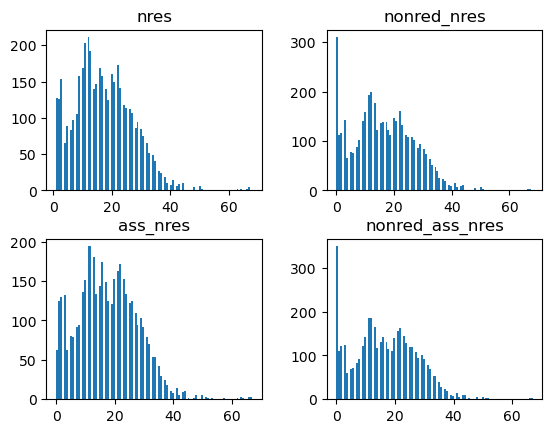

In [70]:
site_residues_df.hist(bins=100, grid=False)

<br>

##### PDBs/Sites for which at least 1 participating chain only has 1 annotated residue.

In [71]:
site_residues_df[site_residues_df.pdb.isin(site_residues_df.query("nres == 1").pdb.values)]

,pdb,site,mod,entity,chain,nres,nonred_nres,ass_nres,nonred_ass_nres
5,4o3u,8,{'label_asym_id': ['C']},1,A,34,34,34,34
6,4o3u,8,{'label_asym_id': ['C']},2,B,1,1,1,1
130,5c2o,130,{'label_asym_id': ['F']},1,A,20,20,20,20
131,5c2o,130,{'label_asym_id': ['F']},1,B,1,1,6,6
149,3etd,168,"{'label_asym_id': ['J', 'Z']}",1,A,11,0,11,0
...,...,...,...,...,...,...,...,...,...
4316,5mvn,5779,{'label_asym_id': ['AB']},1,A,1,1,1,1
4317,5mzr,5780,{'label_asym_id': ['AB']},1,E,16,16,16,16
4318,5mzr,5780,{'label_asym_id': ['AB']},1,A,1,1,1,1
4402,5vex,5866,{'label_asym_id': ['C']},1,A,24,24,24,24


In [141]:
print(
    site_residues_df.query("nres == 1").pdb.drop_duplicates().sample(10, random_state=0).values.tolist()
)

['3kgu', '5w3y', '5w40', '4fyy', '5yvt', '5afj', '4fyx', '2cdq', '3cn2', '7cr2']


In [72]:
site_residues_df[
    site_residues_df.pdb.isin(
        ['3kgu', '5w3y', '5w40', '4fyy', '5yvt', '5afj', '4fyx', '2cdq', '3cn2', '7cr2']
    )
].sort_values(["pdb", "entity", "nres"], ascending=[True, True, False])

,pdb,site,mod,entity,chain,nres,nonred_nres,ass_nres,nonred_ass_nres
442,2cdq,924,{'label_asym_id': ['F']},1,A,17,17,17,17
443,2cdq,924,{'label_asym_id': ['F']},1,B,1,1,1,1
2832,3cn2,3548,{'label_asym_id': ['C']},1,A,12,12,13,13
2833,3cn2,3548,{'label_asym_id': ['C']},1,B,1,1,1,1
2872,3kgu,3572,{'label_asym_id': ['C']},1,A,12,12,12,12
2873,3kgu,3572,{'label_asym_id': ['C']},1,B,1,1,1,1
292,4fyx,592,"{'label_asym_id': ['F', 'G', 'H']}",2,B,28,28,28,28
293,4fyx,592,"{'label_asym_id': ['F', 'G', 'H']}",2,D,1,1,1,1
294,4fyy,599,"{'label_asym_id': ['F', 'G', 'H']}",2,B,27,27,27,27
295,4fyy,599,"{'label_asym_id': ['F', 'G', 'H']}",2,D,1,1,1,1


<br>

##### PDBs/Sites of <u>heteromers</u> for which at least 1 participating chain only has 1 annotated residue.

In [73]:
(
    site_residues_df[
        site_residues_df.pdb.isin(site_residues_df.query("nres == 1").pdb.values)
    ][
        ["pdb", "site", "entity"]
    ]
    .drop_duplicates()
    .value_counts("pdb")
    .sort_values(ascending=False)[:20]
)

pdb
4kfb    4
4ig3    4
5vsw    3
1uwb    2
4rw4    2
4q0b    2
4pwd    2
4puo    2
3ete    2
7ud7    2
1tv6    2
2zd1    2
1sv5    2
1tvr    2
1tyr    2
2b6a    2
1viw    2
5afj    2
1ikx    2
1ikw    2
Name: count, dtype: int64

In [74]:
site_residues_df[
    site_residues_df.pdb.isin(["4kfb", "4ig3", "5vsw", "1uwb", "4rw4", "4q0b", "4pwd"])
].sort_values(["pdb", "entity", "nres"], ascending=[True, True, False])

,pdb,site,mod,entity,chain,nres,nonred_nres,ass_nres,nonred_ass_nres
3102,1uwb,3759,{'label_asym_id': ['C']},1,A,25,25,25,25
3103,1uwb,3759,{'label_asym_id': ['C']},2,B,1,1,1,1
3165,4ig3,3796,{'label_asym_id': ['C']},1,A,26,26,26,26
3168,4ig3,3797,{'label_asym_id': ['K']},1,A,13,13,13,13
3167,4ig3,3797,{'label_asym_id': ['K']},2,B,6,6,6,6
3166,4ig3,3796,{'label_asym_id': ['C']},2,B,1,1,1,1
3171,4kfb,3800,{'label_asym_id': ['I']},1,A,25,25,25,25
3173,4kfb,3801,{'label_asym_id': ['C']},1,A,16,16,16,16
3174,4kfb,3801,{'label_asym_id': ['C']},2,B,3,3,3,3
3172,4kfb,3800,{'label_asym_id': ['I']},2,B,1,1,1,1


<br>

**Sites with the smallest number of annotated residues (taking into account all chains)**

In [100]:
sites_residues_key = {sid: (s["nres"].max(), sid) for sid, s in site_residues_df.groupby("site")}

site_residues_df.sort_values("site", key = lambda x: [sites_residues_key[i] for i in x])[:20]

,pdb,site,mod,entity,chain,nres,nonred_nres,ass_nres,nonred_ass_nres
3416,5iwd,4037,{'label_asym_id': ['B']},1,A,2,2,2,2
1720,5l32,2352,{'label_asym_id': ['G']},1,A,2,2,2,2
1721,5l32,2352,{'label_asym_id': ['G']},1,C,3,3,3,3
1719,5l32,2352,{'label_asym_id': ['G']},1,D,3,3,3,3
2372,2hh7,3094,{'label_asym_id': ['B']},1,A,3,3,10,10
2508,5hcj,3225,{'label_asym_id': ['M']},1,E,3,0,3,0
2506,5hcj,3225,{'label_asym_id': ['M']},1,C,2,0,2,0
2505,5hcj,3225,{'label_asym_id': ['M']},1,B,3,3,3,3
2504,5hcj,3225,{'label_asym_id': ['M']},1,A,2,0,2,0
2507,5hcj,3225,{'label_asym_id': ['M']},1,D,2,0,2,0


- 5iwd: the annotated modulator is a covalently bound molecule in a terminus of the chain and therefore interacts with little residues.
- 5l32: the modulator is a zinc ion in the interface between subunits of a cytochrome homomer, with intersubunit disulfide bonds
- 2hh7: the modulator is a copper ion
- 5hcj, 5hcm: the modulator is a tribromomethane very small molecule between subunits of a cationic pLGIC
- 7e6t: the modulator is a calcium ion binding very shallowly in the calcium-sensing receptor
- 3lsx: small-molecule modulator that binds very shallowly and with low occupancy in the model, but more packed in the assembly (or w/ the symmetry mates) (nres in the assembly go up to 9)
- 2yn6: barium ion

<br>

Proteins/chains/sites with a small number of annotations that may be considered outliers w.r.t. sites that have a size closer to the median size will need to be handled later, e.g. to obtain denoised data for ML.

In [ ]:
# how many of these heteromers will reduce its # of entities (or become homomers/monomers) without these 1-annotation chains?
# nº of sites for which we now have info that in the orig. dataset were NaN, or had only 1 residue or the PDB ID (probably all of them)